<a href="https://colab.research.google.com/github/vidyadhawal/Vidya_Portfolio/blob/master/Employee_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
Attrition is a problem that impacts all businesses, irrespective of geography, industry and size of the company. Employee attrition leads to significant costs for a business, including the cost of business disruption, hiring new staff and training new staff. As such, there is great business interest in understanding the drivers of, and minimizing staff attrition. Let us therefore turn to our predictive modelling capabilities and see if we can predict employee attrition on this dataset.

Understanding why and when employees are most likely to leave can lead to actions to improve employee retention as well as possibly planning new hiring in advance. I will be usign a step-by-step systematic approach using a method that could be used for a variety of ML problems. This project would fall under what is commonly known as "HR Anlytics", "People Analytics".

In this study, we will attempt to solve the following problem statement :

What is the likelihood of an active employee leaving the company?

What are the key indicators of an employee leaving the company?

What policies or strategies can be adopted based on the results to improve employee retention?

## **Importing Python libraries**

In [ ]:
#Importing Libraries for data handling and analysis
import pandas as pd #data processing
import numpy as np #Linear Algebra
#Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import norm,skew
import warnings
warnings.filterwarnings('ignore')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
#sklearn modules for ML model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Libraries for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

#sklearn modules for performance metrics
from sklearn.metrics import confusion_matrix,classification_report,precision_recall_curve
from sklearn.metrics import auc,roc_auc_score,roc_curve,recall_score,log_loss
from sklearn.metrics import f1_score,accuracy_score,average_precision_score

#Ignoring Python warnings
import warnings
warnings.filterwarnings('ignore')

Let us load in the dataset via the trusty Pandas package into a dataframe object and have a quick look at the first few rows

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving Hr_data.csv to Hr_data (1).csv


In [ ]:
#Import Employee Attrition Data
data=pd.read_csv("Hr_data.csv")
data.head()

Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0   51        No  ...                       0                    0
1   31       Yes  ...                       1                    4
2   32        No  ...                       0                    3
3   38        No  ...                       7                    5
4   32        No  ...                       0                    4

[5 rows x 24 columns]

## **Explanatory Data Analysis**

In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together when appropriate.

*   Find patterns in data through data visualization. Reveal hidden secrets of the data through graphs, analysis and charts.
  
*   Univariate analysis
      
      *   Continous variables : Histograms, boxplots. This gives us understanding about the central tendency and spread
      
      *   Categorical variable : Bar chart showing frequency in each category
   
*   Bivariate analysis
       
       *   Continous & Continous : Scatter plots to know how continous variables interact with each other
       
       *   Categorical & categorical : Stacked column chart to show how the frequencies are spread between two
        categorical variables
       
       *   Categorical & Continous : Boxplots or even bar charts

*   Detect outliers

*   Feature engineering

In [ ]:
# Dataset columns
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
# Dataset header
data.head()

Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID  Gender  ...  \
0          2  Life Sciences              1           1  Female  ...   
1          1  Life Sciences              1           2  Female  ...   
2          4          Other              1           3    Male  ...   
3          5  Life Sciences              1           4    Male  ...   
4          1        Medical              1           5    Male  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      Y                11              8   
1                 0.0      Y                23              8   
2                 1.0      Y                15              8   
3                 3.0      Y                11              8   
4                 4.0      Y                12              8   

   StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
0                 0               1.0                      6               1   
1                 1               6.0                      3               5   
2                 3               5.0                      2               5   
3                 3              13.0                      5               8   
4                 2               9.0                      2               6   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     0  
1                        1                     4  
2                        0                     3  
3                        7                     5  
4                        0                     4  

[5 rows x 24 columns]

As observed from the dataset, our target column with which we can point our model to train on would be the "Attrition" column.

The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [ ]:
# let's break down the columns by their type (i.e. int64, float64, object)
data.columns.to_series().groupby(data.dtypes).groups

{dtype('int64'): Index(['Age', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeID',
        'JobLevel', 'MonthlyIncome', 'PercentSalaryHike', 'StandardHours',
        'StockOptionLevel', 'TrainingTimesLastYear', 'YearsAtCompany',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'],
       dtype='object'),
 dtype('float64'): Index(['NumCompaniesWorked', 'TotalWorkingYears'], dtype='object'),
 dtype('O'): Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
        'JobRole', 'MaritalStatus', 'Over18'],
       dtype='object')}

In [ ]:
# Columns datatypes and missing values Numerical features overview
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
Age                        4410 non-null int64
Attrition                  4410 non-null object
BusinessTravel             4410 non-null object
Department                 4410 non-null object
DistanceFromHome           4410 non-null int64
Education                  4410 non-null int64
EducationField             4410 non-null object
EmployeeCount              4410 non-null int64
EmployeeID                 4410 non-null int64
Gender                     4410 non-null object
JobLevel                   4410 non-null int64
JobRole                    4410 non-null object
MaritalStatus              4410 non-null object
MonthlyIncome              4410 non-null int64
NumCompaniesWorked         4391 non-null float64
Over18                     4410 non-null object
PercentSalaryHike          4410 non-null int64
StandardHours              4410 non-null int64
StockOptionLevel           4410 non-n

**Employee Attrition Rate-**
"Employee Attrition Rate is calculated as the percentage of employees who left the company in a given period to the total average number of employees within that period."

We know that average number of employees at company are approximately 4000.Using this we can find out the attrition rate of the company

In [ ]:
atr_rate=len(data[data['Attrition']=='Yes'])/4000
print('Attrition Rate: ',atr_rate*100,'%')

Attrition Rate:  17.775 %


The attrition rate of the company is 17.77% is very high considering the ideal attrition rate is 10% and it is also significantly higher than the global average of 13.2%. Thus we have to dive deep and look at the underlying issues.

### **Numerical features overview**

In [ ]:
data.describe()

Age  DistanceFromHome    Education  EmployeeCount   EmployeeID  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0  2205.500000   
std       9.133301          8.105026     1.023933            0.0  1273.201673   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0  1103.250000   
50%      36.000000          7.000000     3.000000            1.0  2205.500000   
75%      43.000000         14.000000     4.000000            1.0  3307.750000   
max      60.000000         29.000000     5.000000            1.0  4410.000000   

          JobLevel  MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  \
count  4410.000000    4410.000000         4391.000000        4410.000000   
mean      2.063946   65029.312925            2.694830          15.209524   
std       1.106689   47068.888559            2.498887           3.659108   
min       1.000000   10090.000000            0.000000          11.000000   
25%       1.000000   29110.000000            1.000000          12.000000   
50%       2.000000   49190.000000            2.000000          14.000000   
75%       3.000000   83800.000000            4.000000          18.000000   
max       5.000000  199990.000000            9.000000          25.000000   

       StandardHours  StockOptionLevel  TotalWorkingYears  \
count         4410.0       4410.000000        4401.000000   
mean             8.0          0.793878          11.279936   
std              0.0          0.851883           7.782222   
min              8.0          0.000000           0.000000   
25%              8.0          0.000000           6.000000   
50%              8.0          1.000000          10.000000   
75%              8.0          1.000000          15.000000   
max              8.0          3.000000          40.000000   

       TrainingTimesLastYear  YearsAtCompany  YearsSinceLastPromotion  \
count            4410.000000     4410.000000              4410.000000   
mean                2.799320        7.008163                 2.187755   
std                 1.288978        6.125135                 3.221699   
min                 0.000000        0.000000                 0.000000   
25%                 2.000000        3.000000                 0.000000   
50%                 3.000000        5.000000                 1.000000   
75%                 3.000000        9.000000                 3.000000   
max                 6.000000       40.000000                15.000000   

       YearsWithCurrManager  
count           4410.000000  
mean               4.123129  
std                3.567327  
min                0.000000  
25%                2.000000  
50%                3.000000  
75%                7.000000  
max               17.000000

Standard Deviation(std) for the fields "EmployeeCount" and "StandardHours" are zero. Hence these fields does not add value, hence they can be removed.

Plotting univariate Distribution A univariate distribution is a probability distribution of only one random variable.

*   Histogram:
   
   A Histogram visualises the distribution of data over a continuous interval or certain time period. Each bar in a histogram represents the tabulated frequency at each interval/bin. The total area of the Histogram is equal to the number of data.
Histograms help give an estimate as to where values are concentrated, what the extremes are and whether there are any gaps or unusual values. They are also useful for giving a rough view of the probability distribution. Height of the bar represents the frequency per individual interval or bin.

Lets plot Histogram for various factors in the same plot space using the axes.


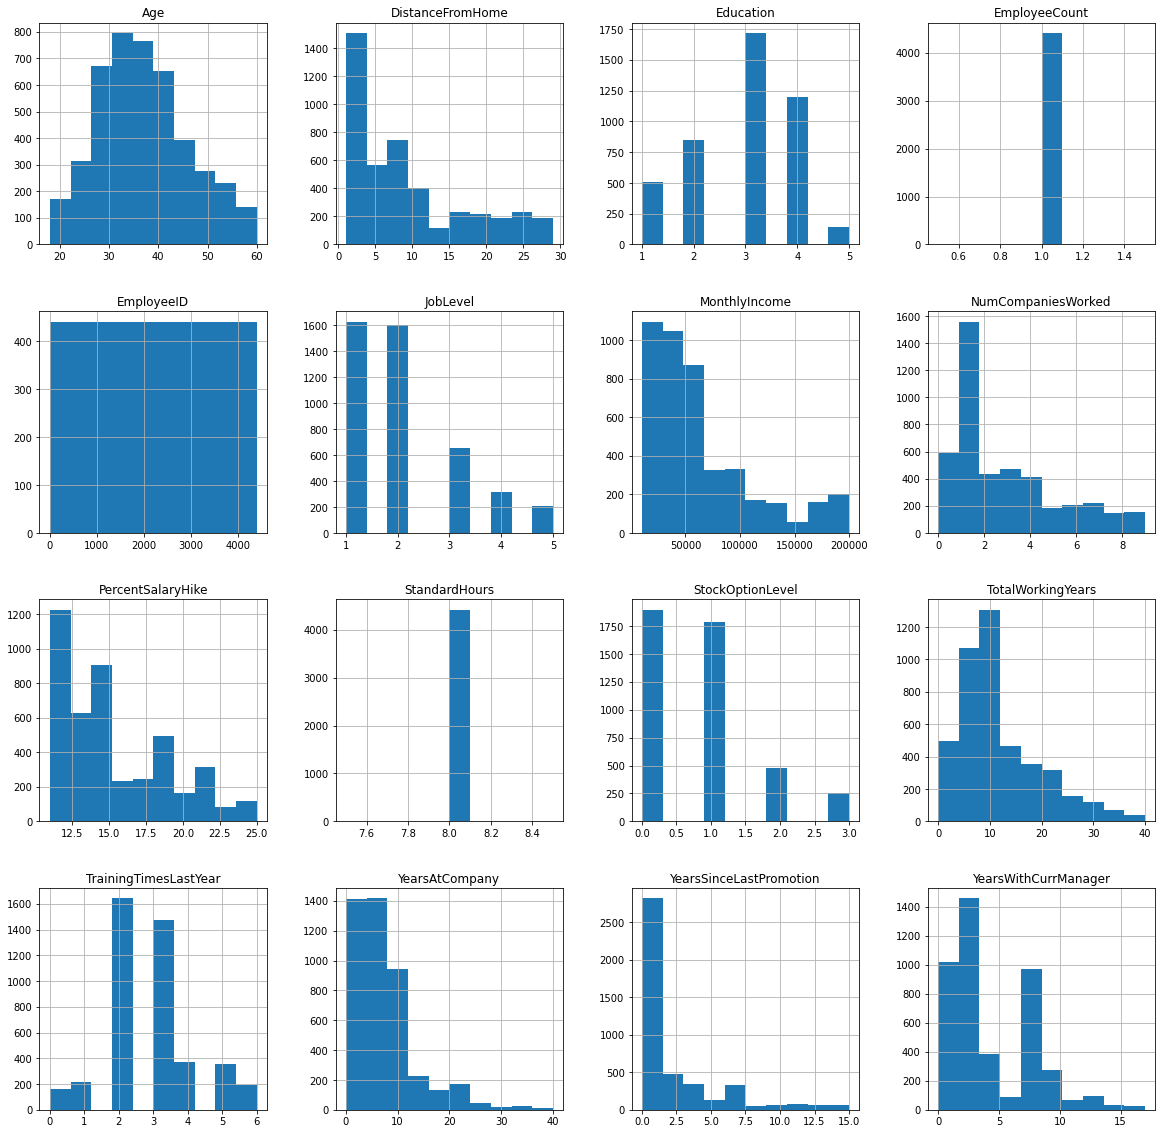

In [ ]:
#Univariate Analysis
data.hist(figsize=(20,20))
plt.show()

A few observations can be made based on the information and histograms for numerical features:

*  Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). Data transformation methods may be required to approach a normal distribution prior to fitting a model to the data.

*  Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

*  EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.

*  EmployeeID Number is likely to be a unique identifier for employees given the feature's quasi-uniform distribution.


*   KDEPLOT:
    
   Rather than a histogram, we can get a smooth estimate of the distribution using a kenel density estimation,which seaborn does with sns.kdeplot.

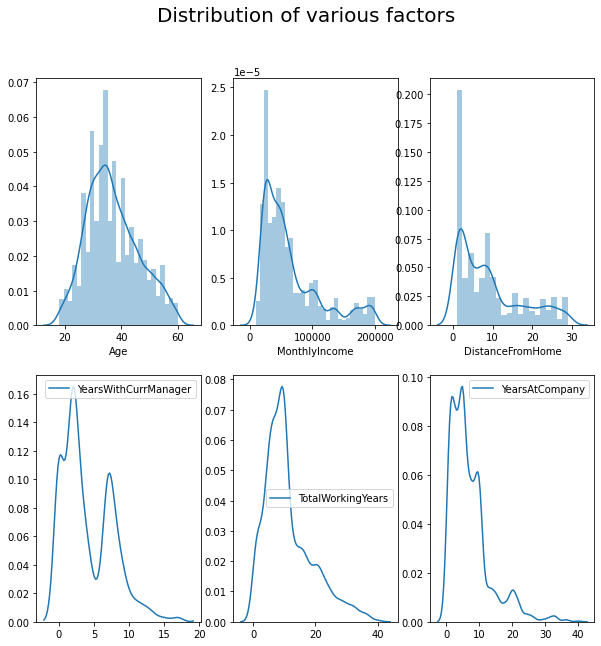

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(10,10))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.distplot(data['Age'], ax = ax[0,0]) 
sns.distplot(data['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(data['DistanceFromHome'], ax = ax[0,2]) 
sns.kdeplot(data['YearsWithCurrManager'], ax = ax[1,0]) 
sns.kdeplot(data['TotalWorkingYears'], ax = ax[1,1]) 
sns.kdeplot(data['YearsAtCompany'], ax = ax[1,2])  
plt.show()

### **Countplot:**
Count Plot A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable.

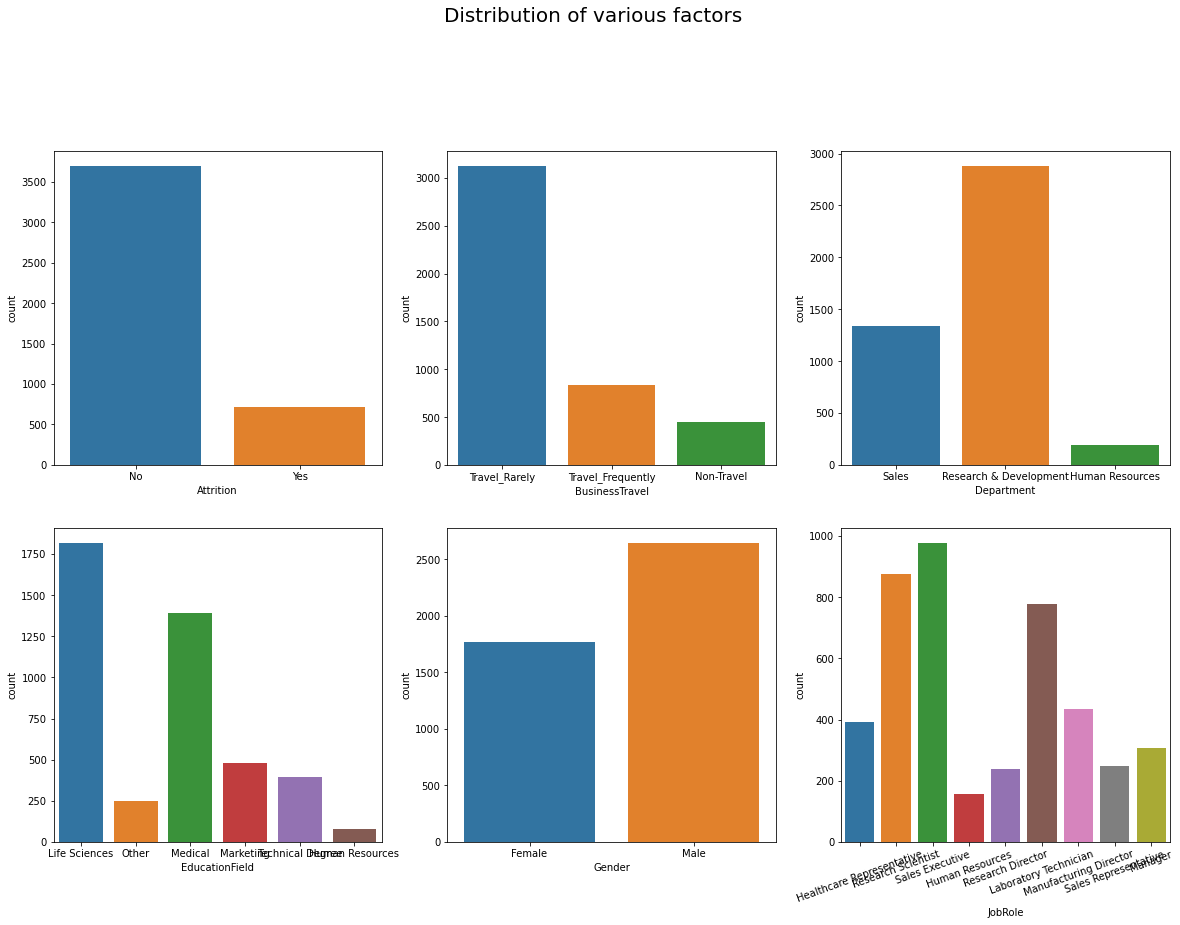

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(data['Attrition'], ax = ax[0,0]) 
sns.countplot(data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(data['Department'], ax = ax[0,2]) 
sns.countplot(data['EducationField'], ax = ax[1,0])
sns.countplot(data['Gender'], ax = ax[1,1])  
sns.countplot(data['JobRole'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

### **Inferences:**
Candidates who has done their bachelor degree in Life Science are employeed more
There are more male employees
Majority of the employees show greater Attrition
Majority of the employees are married
Majority of the employees seem to travel rarely
Majority of the employees are from research & development department

### **Understanding target variable(Attrition)**

The feature 'Attrition' is what this Machine Learning problem is about. We are trying to predict the value of the feature 'Attrition' by using other related features associated with the employee's personal and professional history.

In [ ]:
 #Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
data['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

In [ ]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    data[data['Attrition'] == 'No'].shape[0] / data.shape[0]*100,
    data[data['Attrition'] == 'Yes'].shape[0] / data.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


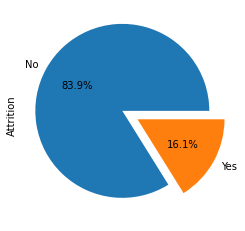

In [ ]:
data.groupby('Attrition').Attrition.count().plot(kind='pie',autopct='%1.1f%%',explode=(0.1,0.1))

*   As shown on the chart above, we see this is an imbalanced class problem. Indeed, the percentage of Current Employees in our dataset is 83.9% and the percentage of Ex-employees is: 16.1%

*   Machine learning algorithms typically work best when the number of instances of each classes are roughly equal. We will have to address this target feature imbalance prior to implementing our Machine Learning algorithms.

# **Feature Distribution by target attribute**

### **Age**

In [ ]:
(mu,sigma)=norm.fit(data.loc[data['Attrition']=='Yes','Age'])
print('Ex-employees: average age={:.1f} years old and standard deviation={:.1f}'.format(mu,sigma))
(mu,sigma)=norm.fit(data.loc[data['Attrition']=='No','Age'])
print('Current employees: average age={:.1f} years old and standard deviation={:.1f}'.format(mu,sigma))

Ex-employees: average age=33.6 years old and standard deviation=9.7
Current employees: average age=37.6 years old and standard deviation=8.9


In [ ]:
data.Age.describe()

count    4410.000000
mean       36.923810
std         9.133301
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

As the mean is almost approximately similar to the median,the distributions of employees age is approximately normal with the average age of 36 years.

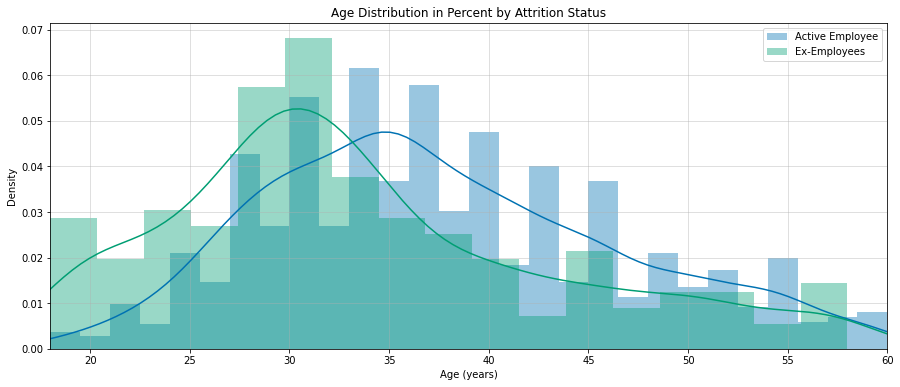

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.distplot(data.loc[data['Attrition'] == 'No', 'Age'], label = 'Active Employee')
sns.distplot(data.loc[data['Attrition'] == 'Yes', 'Age'], label = 'Ex-Employees')
plt.xlim(left=18, right=60)
plt.xlabel('Age (years)')
plt.ylabel('Density')
plt.legend()
plt.title('Age Distribution in Percent by Attrition Status');

Most of the employees who have been a part of the company tends to fall in the range from 25 years to 45 years.


The attrition level among the newer and less experienced employees seems to be the highest.These employees might have left for more lucrative offer or higher studies.

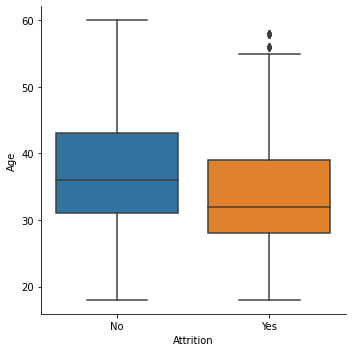

In [ ]:
sns.factorplot(data=data,y='Age',x='Attrition',kind='box')

Note that median as well as maximum age of the people with 'No'  attrition is higher than that of the 'yes' categoy.This shows that people with higher age have lesser tendancy to leave the organization which make sense as they may have setteled in the organization.

### **JobRole**

In [ ]:
pd.crosstab(columns=[data.Attrition],index=[data.JobRole],normalize=True)

Attrition                        No       Yes
JobRole                                      
Healthcare Representative  0.076190  0.012925
Human Resources            0.030612  0.004762
Laboratory Technician      0.147619  0.028571
Manager                    0.059864  0.009524
Manufacturing Director     0.087755  0.010884
Research Director          0.041497  0.012925
Research Scientist         0.162585  0.036054
Sales Executive            0.184354  0.037415
Sales Representative       0.048299  0.008163

### **Education**

In [ ]:
# Education Field of employees
data['EducationField'].value_counts()

Life Sciences       1818
Medical             1392
Marketing            477
Technical Degree     396
Other                246
Human Resources       81
Name: EducationField, dtype: int64

Several Education Fields are represented in the dataset, namely: Human Resources, Life Sciences, Marketing, Medical, Technical Degree, and a miscellaneous category Other. Here, I plot the normalized % of Leavers for each Education Field.

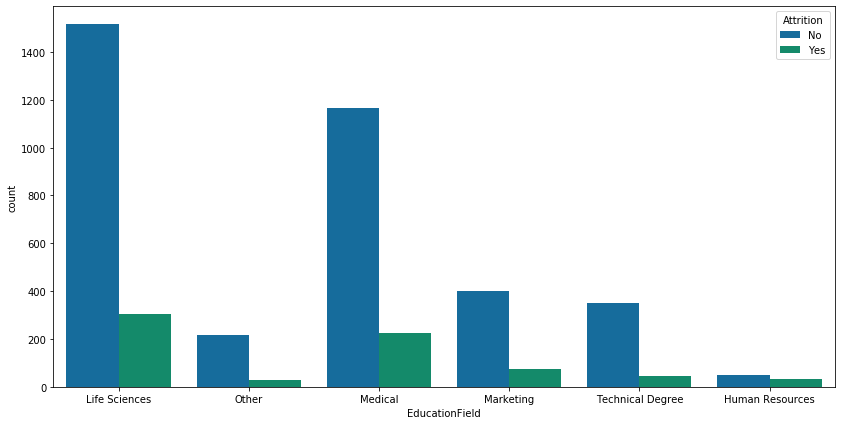

In [ ]:
plt.figure(figsize=(14,7))Gender
sns.countplot(x='EducationField',data=data,hue='Attrition')

### **Gender**

In [ ]:
# Gender of employees
data['Gender'].value_counts()

Male      2646
Female    1764
Name: Gender, dtype: int64

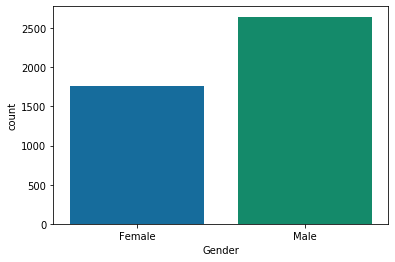

In [ ]:
sns.countplot(data['Gender'])

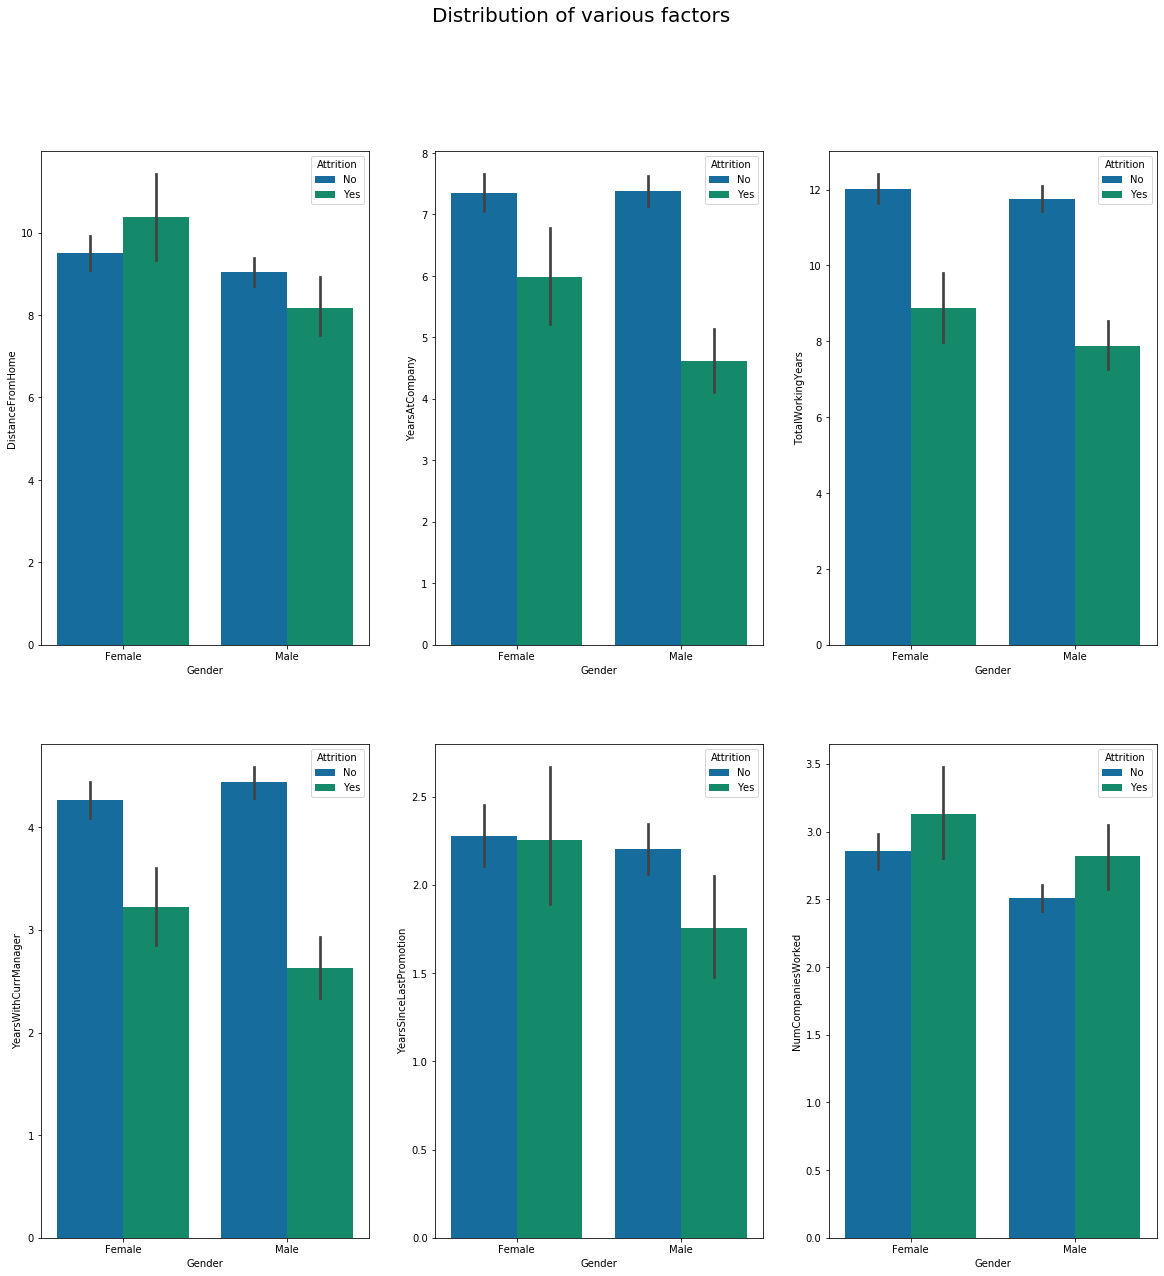

In [ ]:
fig,ax = plt.subplots(2,3, figsize=(20,20))               # 'ax' has references to all the four axes
plt.suptitle("Distribution of various factors", fontsize=20)
sns.barplot(data['Gender'],data['DistanceFromHome'],hue = data['Attrition'], ax = ax[0,0]); 
sns.barplot(data['Gender'],data['YearsAtCompany'],hue = data['Attrition'], ax = ax[0,1]); 
sns.barplot(data['Gender'],data['TotalWorkingYears'],hue = data['Attrition'], ax = ax[0,2]); 
sns.barplot(data['Gender'],data['YearsWithCurrManager'],hue = data['Attrition'], ax = ax[1,0]); 
sns.barplot(data['Gender'],data['YearsSinceLastPromotion'],hue = data['Attrition'], ax = ax[1,1]); 
sns.barplot(data['Gender'],data['NumCompaniesWorked'],hue = data['Attrition'], ax = ax[1,2]); 
plt.show()

Conclusion from above fig

1.Distance from home matters to women employees more than men. Female employes are spending more years in one company compare to their counterpart.

2.Female employes spending more years in current company are more inclined to switch.

### **Marital Status**

In [ ]:
# Marital Status of employees
data['MaritalStatus'].value_counts()

Married     2019
Single      1410
Divorced     981
Name: MaritalStatus, dtype: int64

The dataset features three marital status: Married (2019 employees), Single (1410 employees), Divorced (981 employees).

### **Distance from home**

In [ ]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(data['DistanceFromHome'].min(),
                                                                                       data['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [ ]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees {:.2f} miles'.format(data[data['Attrition']=='No']['DistanceFromHome'].mean(),data[data['Attrition']=='Yes']['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 9.23 miles and ex-employees 9.01 miles


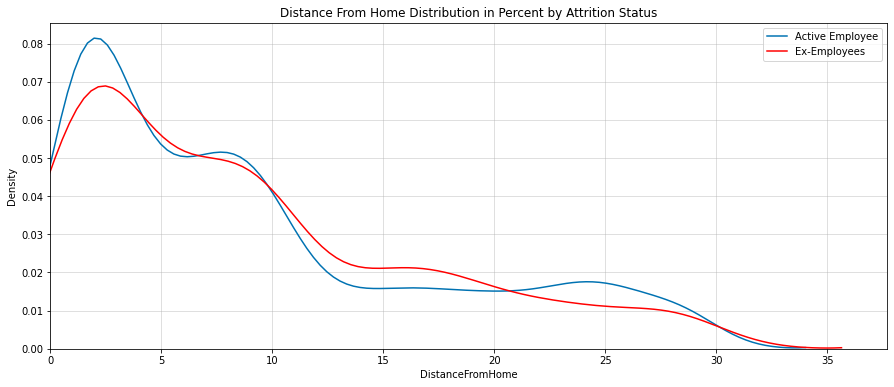

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Ex-Employees',color='red')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

Most of the employees stay closer to the office location.
There is slightly higher proportion of attrited employees who stay away from the office 

In [ ]:
#Lets look at distance from home and attrition levels among various job roles

data.groupby(['JobRole','Attrition']).DistanceFromHome.mean().unstack()

Attrition                         No        Yes
JobRole                                        
Healthcare Representative   8.714286   9.052632
Human Resources             8.955556  11.285714
Laboratory Technician      10.322581   9.000000
Manager                     7.954545   8.571429
Manufacturing Director      9.379845   7.750000
Research Director           8.786885   9.947368
Research Scientist          8.899582  10.301887
Sales Executive             9.391144   7.090909
Sales Representative        9.014085  11.500000

Among the employees in various job roles, the mean distance of work from home for Human Resources,research Scaientist,Sales Representative who left the company is larger than the mean diastance of work from home for the employees who did not leave.

### **Business Travel**

In [ ]:
data['BusinessTravel'].value_counts()

Travel_Rarely        3129
Travel_Frequently     831
Non-Travel            450
Name: BusinessTravel, dtype: int64

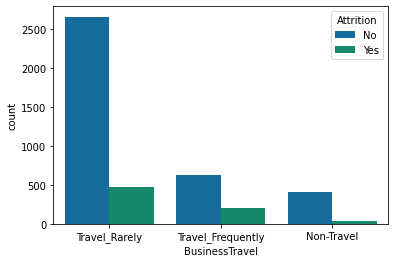

In [ ]:
sns.countplot(x='BusinessTravel',hue='Attrition',data=data)

### **Job Level**

In [ ]:
data['JobLevel'].value_counts()

1    1629
2    1602
3     654
4     318
5     207
Name: JobLevel, dtype: int64

### **Department**

In [ ]:
# The organisation consists of several departments
data['Department'].value_counts()

Research & Development    2883
Sales                     1338
Human Resources            189
Name: Department, dtype: int64

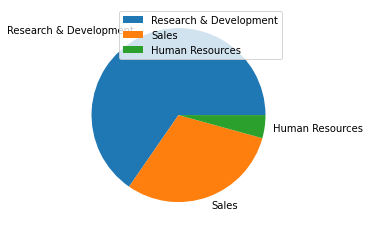

In [ ]:
plt.pie(data.Department.value_counts().values,labels=data.Department.value_counts().index)
plt.legend()
plt.show()

As we can see the Reaserach & Development costitutes the major part of the company and HR department only constitutes small part of total distribution.

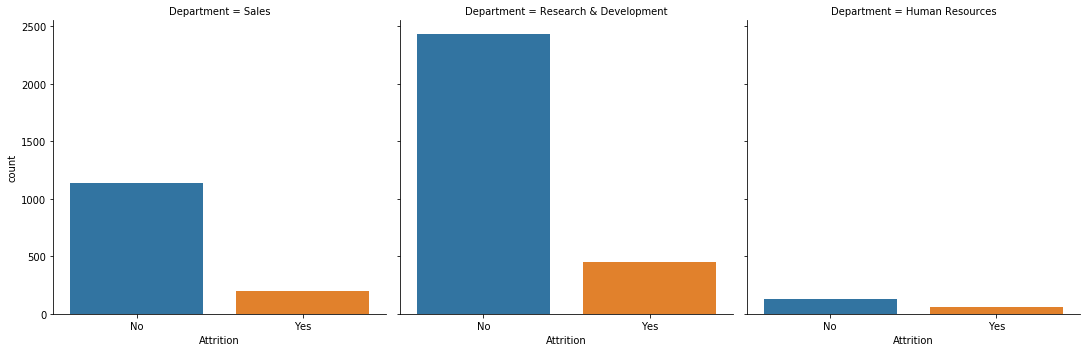

In [ ]:
sns.factorplot(data=data,kind='count',x='Attrition',col='Department')

Text(0.5, 1.0, 'Percentage of Attrition across Every Deaprtment')

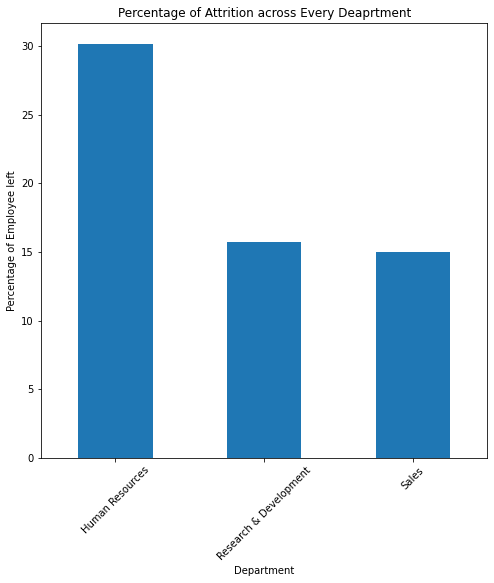

In [ ]:
#Plotting the percentage of attrition across dept
plt.figure(figsize=(8,8))
x=data.groupby(['Department']).Attrition.count()
y=data[data['Attrition']=='Yes'].groupby(['Department']).Age.count()
#Calculate Percentage
z=y/x*100
z.plot(kind='bar')
plt.xlabel('Department')
plt.xticks(rotation=45)
plt.ylabel('Percentage of Employee left')
plt.title('Percentage of Attrition across Every Deaprtment')

In [ ]:
pd.crosstab(columns=[data['Attrition']],index=[data.Department],margins=True,normalize='index')

Attrition                     No       Yes
Department                                
Human Resources         0.698413  0.301587
Research & Development  0.842872  0.157128
Sales                   0.849776  0.150224
All                     0.838776  0.161224

Even though the HR department is smallest part of the company,nearly 30% of it's department has left in the previous year.

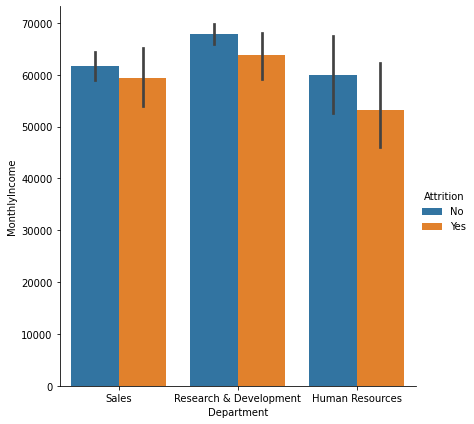

In [ ]:
#Plotting the salaries across Department
sns.catplot(x='Department',y='MonthlyIncome',hue='Attrition',data=data,kind='bar',height=6)


we can see that across all department,employees who have left have had lesser income as compared to the rest in heir department and also HR has the least average income which can also be contributing to such high rate of attrition in the department.

In [ ]:
print("Number of training times last year varies from {} to {} years.".format(
    data['TrainingTimesLastYear'].min(), data['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


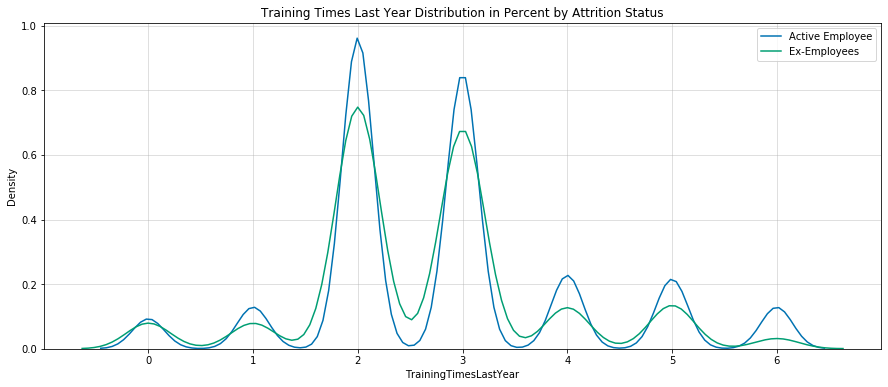

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Ex-Employees')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution in Percent by Attrition Status');

### **No of companies worked**

In [ ]:
data['NumCompaniesWorked'].value_counts()

1.0    1558
0.0     586
3.0     474
2.0     438
4.0     415
7.0     222
6.0     208
5.0     187
9.0     156
8.0     147
Name: NumCompaniesWorked, dtype: int64

### **years at the company**

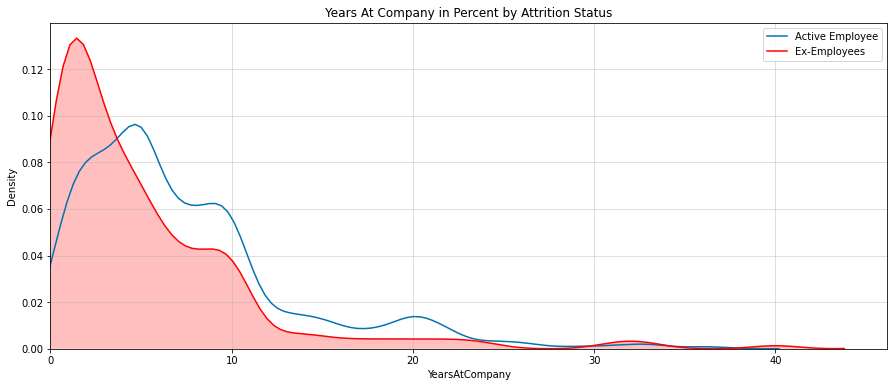

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Ex-Employees',color='r',shade=True)
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

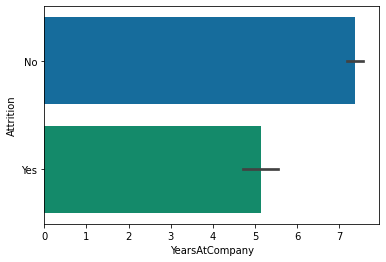

In [ ]:
sns.barplot(x='YearsAtCompany',y='Attrition',data=data)

For employees who stay with company for 5 years,more than 50% of them choose to leave.5-years is a peak.

### **Years with CurrentManager**

In [ ]:
print("Number of Years with the current manager varies from {} to {} years.".format(
    data['YearsWithCurrManager'].min(), data['YearsWithCurrManager'].max()))

Number of Years with the current manager varies from 0 to 17 years.


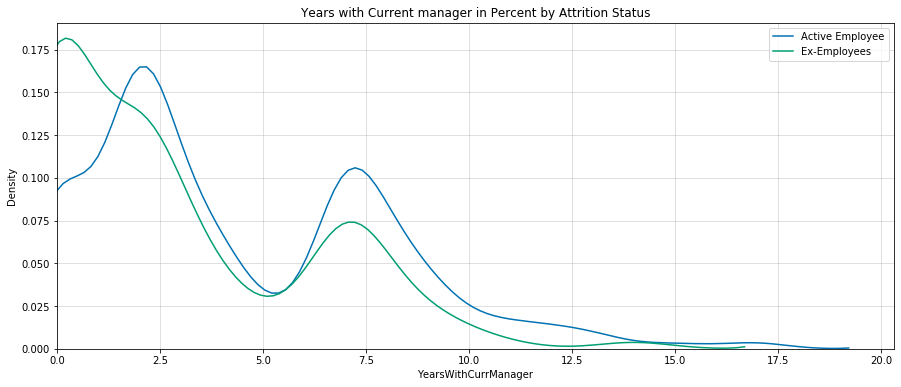

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Ex-Employees')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years with Current manager in Percent by Attrition Status');

In [ ]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    data['YearsSinceLastPromotion'].min(), data['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


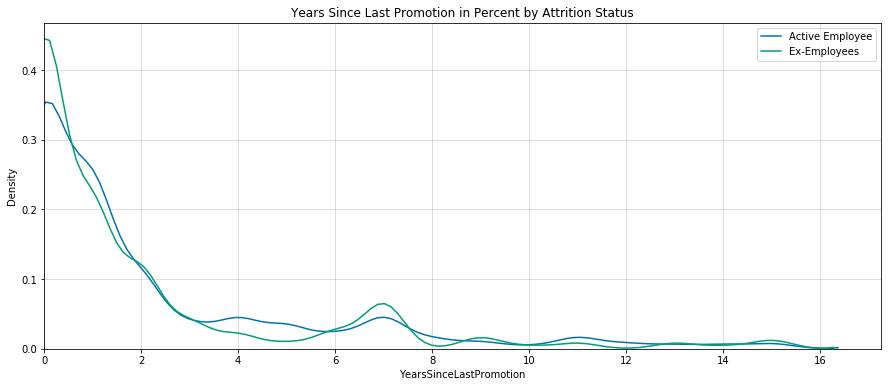

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');

In [ ]:
data['StandardHours'].value_counts()

8    4410
Name: StandardHours, dtype: int64

All employees have a standard 8-hour work commitment

### **Monthly Income**

In [ ]:
print("Employee Monthly Income varies from {} to {}.".format(
    data['MonthlyIncome'].min(), data['MonthlyIncome'].max()))

Employee Monthly Income varies from 10090 to 199990.


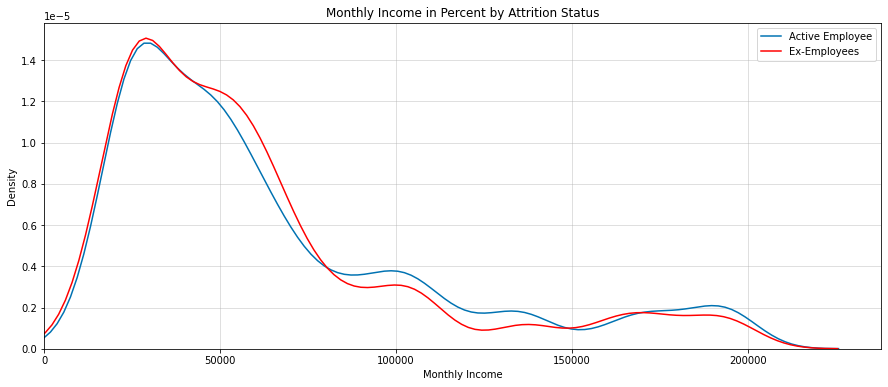

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Ex-Employees',color='red')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');

As per the graph Monthly Income has no major effect on attrition.

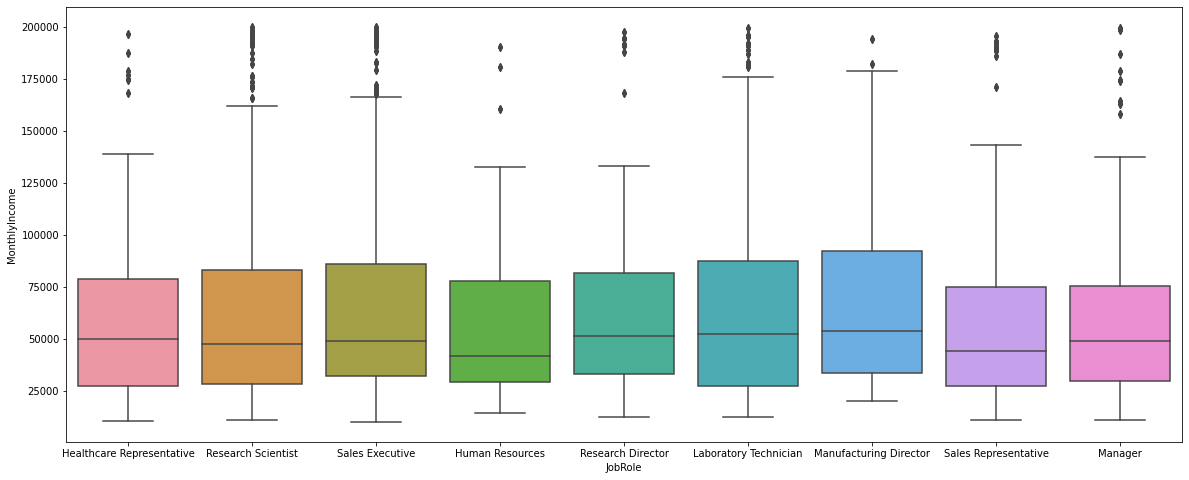

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot('JobRole','MonthlyIncome',data=data)

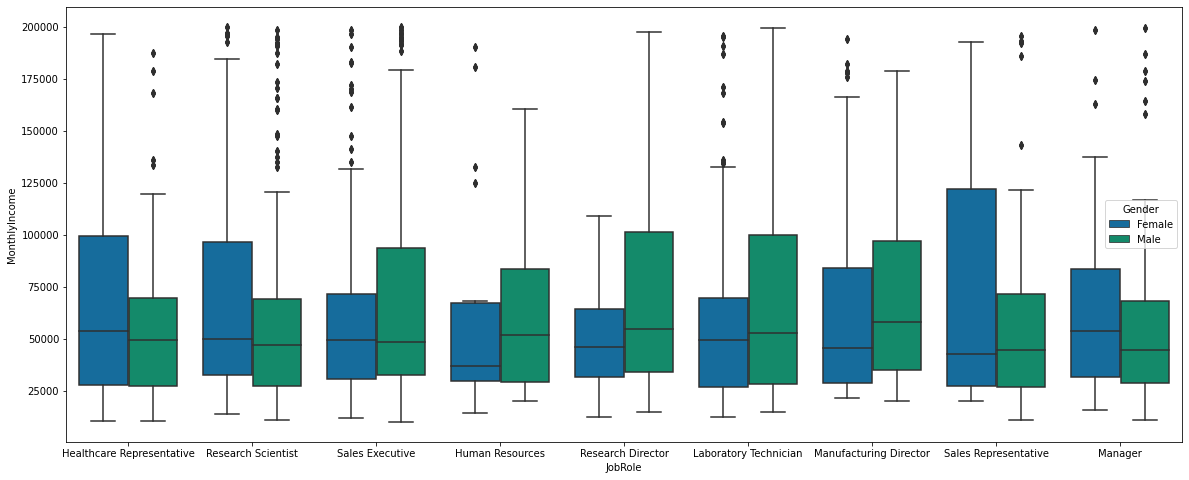

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot('JobRole', 'MonthlyIncome', hue = 'Gender',data = data)

### **Percent Salary Hike**

In [ ]:
print("Percentage Salary Hikes varies from {}% to {}%.".format(
    data['PercentSalaryHike'].min(), data['PercentSalaryHike'].max()))

Percentage Salary Hikes varies from 11% to 25%.


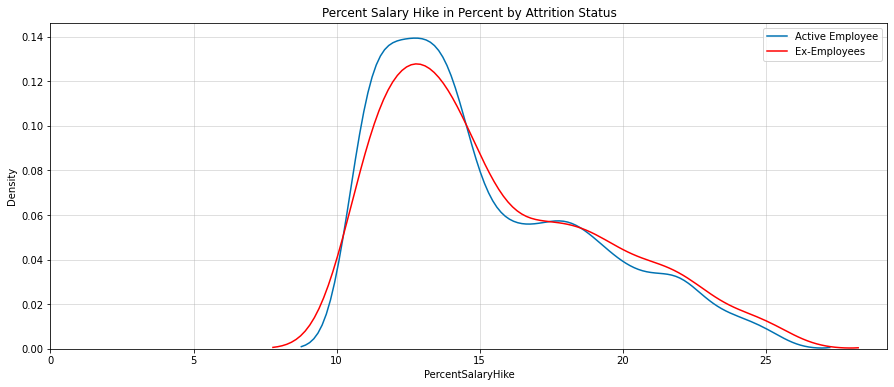

In [ ]:
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(data.loc[data['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(data.loc[data['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Ex-Employees',color='red')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike in Percent by Attrition Status');

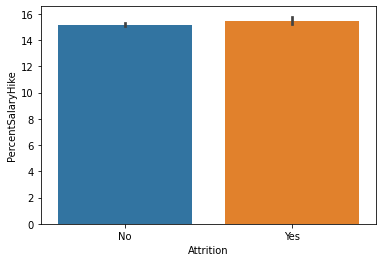

In [ ]:
sns.barplot(x='Attrition',y='PercentSalaryHike',data=data)

## **Corelation**

By plotting a correlation matrix, we have a very nice overview of how the features are related to one another. For a Pandas dataframe, we can conveniently use the call .corr which by default provides the Pearson Correlation values of the columns pairwise in that dataframe.

In this correlation plot, I will use the the seaborn library to produce a interactive Pearson correlation matrix via the Heatmap function as follows:

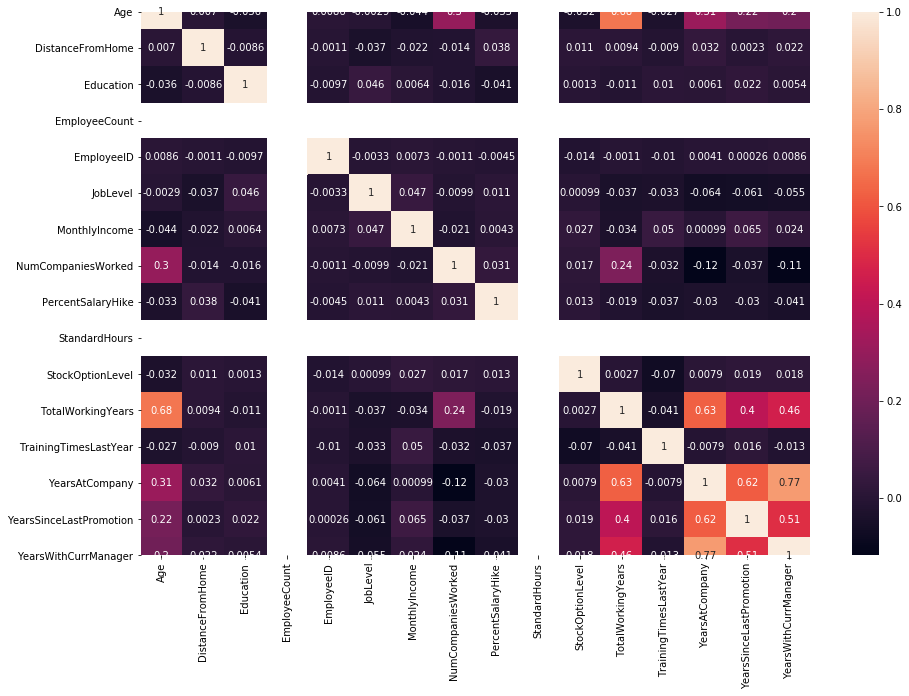

In [ ]:
corelation=data.corr()
plt.figure(figsize=(25, 10))
sns.heatmap(corelation,annot=True)

As shown above, "Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.


Takeaway from the plots
From the correlation plots, we can see that quite a lot of our columns seem to be poorly correlated with one another. Generally when making a predictive model, it would be preferable to train a model with features that are not too correlated with one another so that we do not need to deal with redundant features. 
In the case that we have quite a lot of correlated features one could perhaps apply a technique such as Principal Component Analysis (PCA) to reduce the feature space.
Analysis of correlation results (sample analysis):
-Monthly income is highly correlated with Job level.
-Job level is highly correlated with total working hours.
-Monthly income is highly correlated with total working hours.
-Age is also positively correlated with the Total working hours.
-Marital status and stock option level are negatively correlated

### **EDA Concluding Remarks**

Let's summarise the findings from this EDA:

*  The dataset contains some  missing  data values.

*  The strongest positive correlations with the target features are: Performance Rating, Monthly Rate, Num Companies Worked, Distance From Home.
    
*  The strongest negative correlations with the target features are: Total Working Years, Job Level, Years In Current Role, and Monthly Income.

*  The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.

*  Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

Other observations include:

*  Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.

*  About 10% of leavers left when they reach their 2-year anniversary at the company.

*  Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their counterparts.

*  People who live further away from their work show higher proportion of leavers compared to their counterparts.

*  People who travel frequently show higher proportion of leavers compared to their counterparts.

*  People who have to work overtime show higher proportion of leavers compared to their counterparts.

*  Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.

*  Employees that have already worked at several companies previously (already "bounced" between workplaces) show higher proportion of leavers compared to their counterparts.

# **Data preprocessing**

In this section, we undertake data pre-processing steps to prepare the datasets for Machine Learning algorithm implementation.

#### **Check and remove if there are any fields which does not add value**

In [ ]:
data['Over18'].value_counts()

Y    4410
Name: Over18, dtype: int64

Over18 has only one unique value which represents all employees are above 18 years of age. So, ideally this feature also has no variation  so won't help in our prediction model.

In [ ]:
data.describe()

Age  ...  YearsWithCurrManager
count  4410.000000  ...           4410.000000
mean     36.923810  ...              4.123129
std       9.133301  ...              3.567327
min      18.000000  ...              0.000000
25%      30.000000  ...              2.000000
50%      36.000000  ...              3.000000
75%      43.000000  ...              7.000000
max      60.000000  ...             17.000000

[8 rows x 16 columns]

Standard Deviation(std) for the fields "EmployeeCount" and "StandardHours" are zero. Hence these fields does not add value, hence they can be removed.

In [ ]:
data.drop(['EmployeeCount','EmployeeID','Over18','StandardHours'],axis=1,inplace=True)

To look for any null values, we can just invoke the isnull call as follows

In [ ]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [ ]:
data.fillna(0,axis=1,inplace=True)

In [ ]:
data.head()

Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0   51        No  ...                       0                    0
1   31       Yes  ...                       1                    4
2   32        No  ...                       0                    3
3   38        No  ...                       7                    5
4   32        No  ...                       0                    4

[5 rows x 20 columns]

### **Encoding**

Machine Learning algorithms can typically only have numerical values as their predictor variables. Hence Label Encoding becomes necessary as they encode categorical labels with numerical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

In [ ]:
print(data.shape)
data.head()

(4410, 20)


Age Attrition  ... YearsSinceLastPromotion YearsWithCurrManager
0   51        No  ...                       0                    0
1   31       Yes  ...                       1                    4
2   32        No  ...                       0                    3
3   38        No  ...                       7                    5
4   32        No  ...                       0                    4

[5 rows x 20 columns]

In [ ]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = []
for col in data.columns[1:]:
    if data[col].dtype == 'object':
        if len(list(data[col].unique())) <= 2:
            le.fit(data[col])
            data[col] = le.transform(data[col])
            le_count.append(col)
print('{} columns were label encoded.'.format(le_count))

['Attrition', 'Gender'] columns were label encoded.


In [ ]:
# convert rest of categorical variable into dummy
data = pd.get_dummies(data, drop_first=True)

In [ ]:
print(data.shape)
data.head()

(4410, 34)


Age  Attrition  ...  MaritalStatus_Married  MaritalStatus_Single
0   51          0  ...                      1                     0
1   31          1  ...                      0                     1
2   32          0  ...                      1                     0
3   38          0  ...                      1                     0
4   32          0  ...                      0                     1

[5 rows x 34 columns]

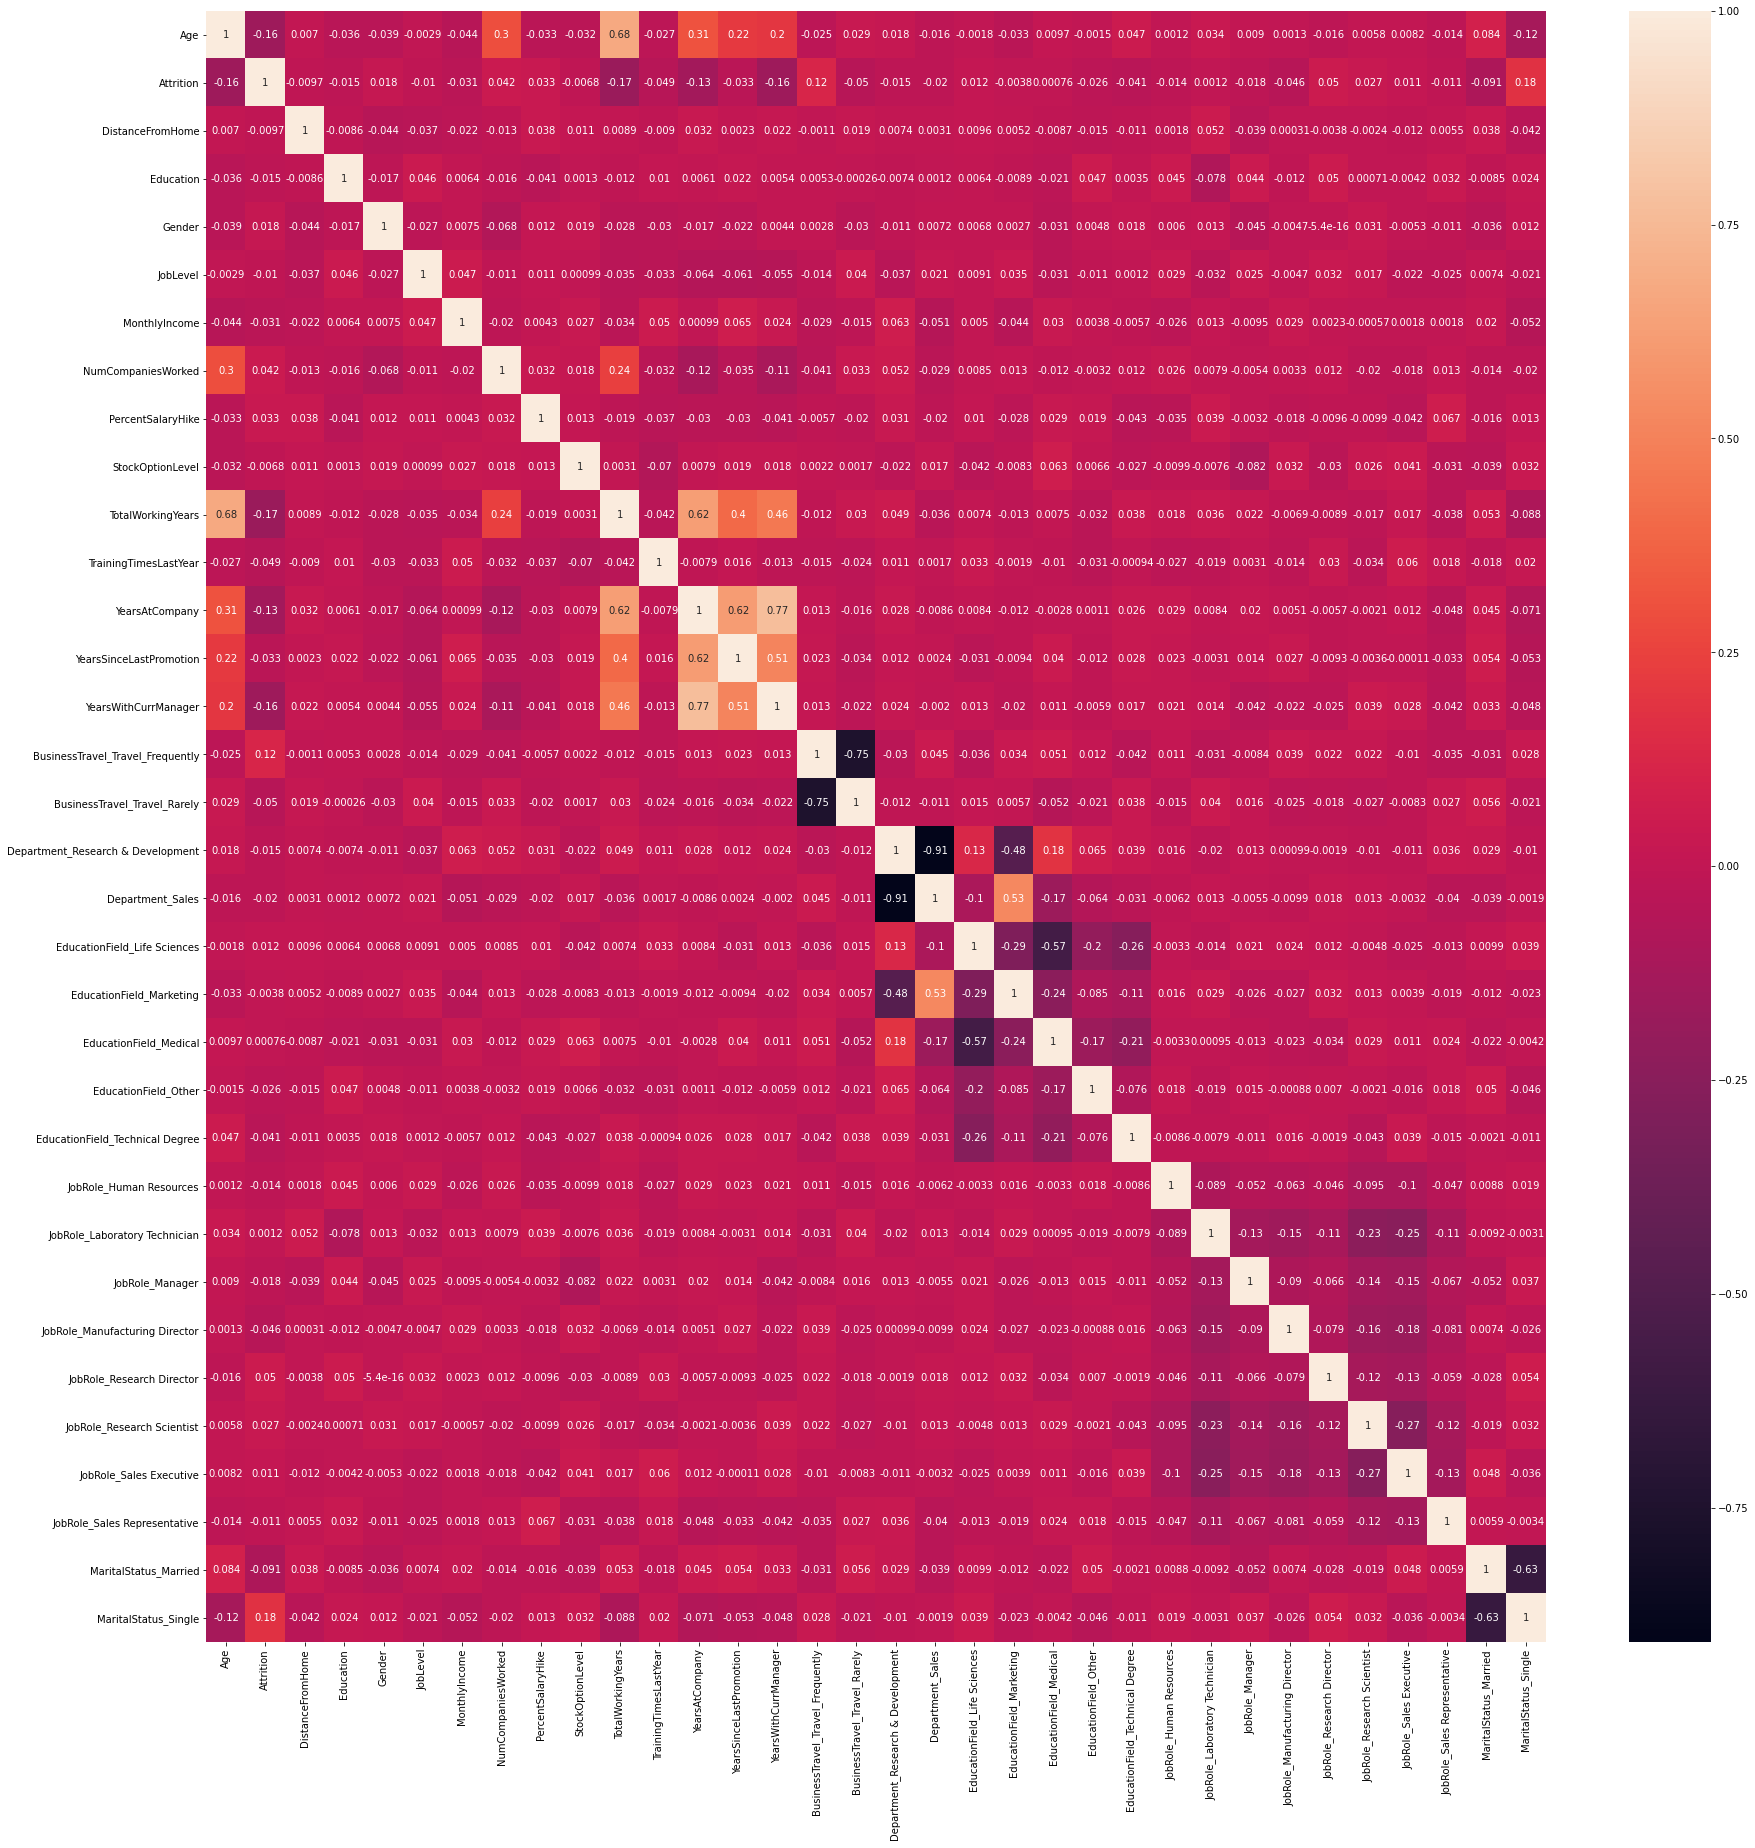

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.shape

(4410, 34)

## **Feature Scaling**

Feature Scaling using MinMaxScaler essentially shrinks the range such that the range is now between 0 and n. Machine Learning algorithms perform better when input numerical variables fall within a similar scale. In this case, we are scaling between 0 and 5.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler(feature_range=(0,5))
HR_col=list(data.columns)
HR_col.remove('Attrition')
for col in HR_col:
  data[col]=data[col].astype(float)
  data[col]=Scaler.fit_transform(data[[col]])
data['Attrition']=pd.to_numeric(data['Attrition'],downcast='float')
data.head()

Age  Attrition  ...  MaritalStatus_Married  MaritalStatus_Single
0  3.928571        0.0  ...                    5.0                   0.0
1  1.547619        1.0  ...                    0.0                   5.0
2  1.666667        0.0  ...                    5.0                   0.0
3  2.380952        0.0  ...                    5.0                   0.0
4  1.666667        0.0  ...                    0.0                   5.0

[5 rows x 34 columns]

Feature scaling is a method used to standardize the range of independent variables or features of data.
Since the range of values of raw data varies widely,in some machine learning algorithms, objective functions will not work properly without normalization.

## **Implementing Machine Learning Models**

After performing some exploratory data analysis and simple feature engineering as well as having ensured that all categorical values are encoded, we are now ready to proceed onto building our models.

### **Splitting Data into Train and Test sets**
But before we even start training a model, we will have to partition our dataset into a training set and a test set using sklearn.

In [ ]:
#Split data into training and Testing set:
#Choose dependent and independent var
#here dependent var is Attrition and rest of the var are indepdent var.
X=data.drop('Attrition',axis=1)
y=data['Attrition']

In [ ]:
# Import the train_test_split method
from sklearn.model_selection import train_test_split
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=7,stratify=y)

In [ ]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (3307, 33)
Number transactions y_train dataset:  (3307,)
Number transactions X_test dataset:  (1103, 33)
Number transactions y_test dataset:  (1103,)


## **Baeline Algorithms**
Let's first use a range of baseline algorithms (using out-of-the-box hyper-parameters) before we move on to more sophisticated solutions. The algorithms considered in this section are: Logistic Regression, Random Forest, SVM, KNN, Decision Tree Classifier, Gaussian NB.

In [ ]:
#selection of algorithms to consider and set performance measure
models=[]
models.append(('Logistic Regression',LogisticRegression(solver='liblinear',random_state=7,class_weight='balanced')))
models.append(('Random Forest',RandomForestClassifier(n_estimators=100,random_state=7)))
models.append(('SVM',SVC(gamma='auto',random_state=7)))
models.append(('KNN',KNeighborsClassifier(n_neighbors=2)))
models.append(('Decision Tree',DecisionTreeClassifier(random_state=7)))
models.append(('Gradient Boosting',GradientBoostingClassifier(n_estimators=1000,learning_rate=0.01)))
models.append(('XGB Classifier',XGBClassifier()))

Lets evaluate each model in turn and calculate accuracy and standard deviation scores

In [ ]:
acc_results=[]
auc_results=[]
names=[]
#set table topopulate with performance results
col=['Algorithm','ROC AUC Mean','ROC AUC STD','Accuracy Mean','Accuracy Std']
df_results=pd.DataFrame(columns=col)
i=0
#Evaluate each model using cross validation
for name,model in models:
  kfold=KFold(n_splits=10,random_state=7)  #10 fold cross validation
  cv_acc_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
  cv_auc_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  df_results.loc[i]=[name,round(cv_acc_results.mean()*100,2),
                     round(cv_auc_results.mean()*100,2),
                     round(cv_auc_results.std()*100,2),
                     round(cv_acc_results.std()*100,2)]
  i+=1
df_results.sort_values(by=['ROC AUC Mean'],ascending=False)


Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy Std
1        Random Forest         98.03        99.17           0.66          0.80
4        Decision Tree         97.25        94.93           1.64          0.77
2                  SVM         94.01        97.09           1.07          1.10
3                  KNN         91.50        93.05           2.09          1.17
5    Gradient Boosting         87.57        86.71           2.60          1.27
6       XGB Classifier         86.94        86.06           2.93          1.36
0  Logistic Regression         66.13        73.72           1.71          2.08

*   We can observe 3 models which performs very well i.e Random Forest,Decision Tree & SVM.

Text(0.5, 1.0, 'ROC AUC')

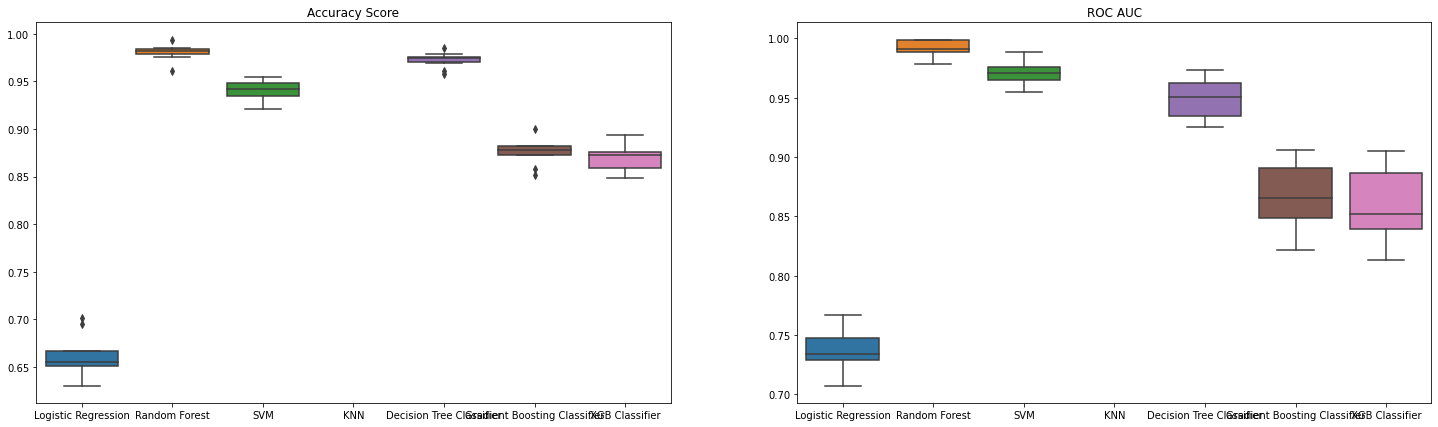

In [ ]:
plt.figure(figsize=(25,7))
plt.subplot(1,2,1)
sns.boxplot(x=names,y=acc_results)
plt.title('Accuracy Score')

plt.subplot(1,2,2)
sns.boxplot(x=names,y=auc_results)
plt.title('ROC AUC')

Based on our ROC AUC comparison analysis,Random Forest and Decision Tree show the highest AUC scores. We will shortlist these two algorithms for further analysis.

# **Handling Data Imbalance**

Since we have already noted the severe imbalance in the values within the target variable, let us implement the **SMOTE ** method in the dealing with the skewed value via the imblearn Python package

In [ ]:
#Performing OverSample using SMOTE(Synthetic Minority Over Sampling Technique)
#import imbalanced-learn as imblearn

import imblearn
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x1,y1 = smote.fit_sample(X,y)
X_train,X_test,y_train,y_test = train_test_split(x1,y1,test_size=0.3,random_state=10)

In [ ]:
acc_results=[]
auc_results=[]
names=[]
#set table topopulate with performance results
col=['Algorithm','ROC AUC Mean','ROC AUC STD','Accuracy Mean','Accuracy Std']
df_results=pd.DataFrame(columns=col)
i=0
#Evaluate each model using cross validation
for name,model in models:
  kfold=KFold(n_splits=10,random_state=7)  #10 fold cross validation
  cv_acc_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
  cv_auc_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='roc_auc')
  acc_results.append(cv_acc_results)
  auc_results.append(cv_auc_results)
  names.append(name)
  df_results.loc[i]=[name,round(cv_acc_results.mean()*100,2),
                     round(cv_auc_results.mean()*100,2),
                     round(cv_auc_results.std()*100,2),
                     round(cv_acc_results.std()*100,2)]
  i+=1
df_results.sort_values(by=['ROC AUC Mean'],ascending=False)

Algorithm  ROC AUC Mean  ROC AUC STD  Accuracy Mean  Accuracy Std
1        Random Forest         99.59        99.99           0.01          0.33
2                  SVM         98.67        99.95           0.10          0.54
3                  KNN         98.38        98.41           0.79          0.77
4        Decision Tree         97.53        97.53           0.92          0.93
5    Gradient Boosting         87.25        95.27           0.89          1.66
6       XGB Classifier         86.52        94.73           1.00          1.60
0  Logistic Regression         68.33        76.93           1.97          1.93

#**Random Forest**
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Random Forest is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score
def print_score(models,X_train,y_train,X_test,y_test,train=True):
  if train:
    pred=models.predict(X_train)
    print("Train Result:\n====================================================")
    print(f"accuracy_score:{accuracy_score(y_train,pred)}\n")
    print(f"classification report: \n\tPrecision:{precision_score(y_train,pred)}\n\tRecall Score:{recall_score(y_train,pred)}\n\tF1_score:{f1_score(y_train,pred)}\n")
    print(f"confusion_matrix:\n{confusion_matrix(y_train,pred)}\n")
    fpr_tr,tpr_tr,_=roc_curve(y_train,pred)
    plt.plot(fpr_tr,tpr_tr,color='deeppink')
    plt.plot([0,1],[0,1],'k--')
  elif train==False:
    pred=models.predict(X_test)
    print(f"Test Result:\n====================================================")
    print(f"accuracy_score:{accuracy_score(y_test,pred)}\n")
    print(f"classification report: \n\tPrecision:{precision_score(y_test,pred)} \n\tRecall Score:{recall_score(y_test,pred)} \n\tF1_score:{f1_score(y_test,pred)}\n")
    print(f"confusion_matrix:\n{confusion_matrix(y_test,pred)}")
    fpr_lm,tpr_lm,_=roc_curve(y_test,pred)
    plt.plot(fpr_lm,tpr_lm,color='navy')
    plt.plot([0,1],[0,1],'k--')

Train Result:
accuracy_score:1.0

classification report: 
	Precision:1.0
	Recall Score:1.0
	F1_score:1.0

confusion_matrix:
[[2571    0]
 [   0 2607]]

Test Result:
accuracy_score:0.9945945945945946

classification report: 
	Precision:0.9891304347826086 
	Recall Score:1.0 
	F1_score:0.994535519125683

confusion_matrix:
[[1116   12]
 [   0 1092]]


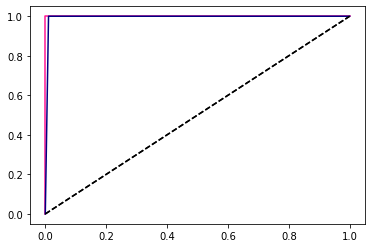

In [ ]:
from sklearn.ensemble import RandomForestClassifier
seed=0 # We set our random seed to zero for reproducibility
random_forest=RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,y_train)
print_score(random_forest,X_train,y_train,X_test,y_test,train=True)
print_score(random_forest,X_train,y_train,X_test,y_test,train=False)


In [ ]:
y_rf=random_forest.predict(X_test)
accuracy_score_rf=accuracy_score(y_test,y_rf)
print('Accuracy of RandomForest is:',accuracy_score_rf)

Accuracy of RandomForest is: 0.9945945945945946


Classification Accuracy is the number of correct predictions made as a ratio of all predictions made. It is the most common evaluation metric for classification problems. However, it is often misused as it is only really suitable when there are an equal number of observations in each class and all predictions and prediction errors are equally important. It is not the case in this project, so a different scoring metric may be more suitable.

#**Random Forest hyperparameter tuning**

###**a)Randomized Search Cross Validation**

In [ ]:
seed=0 # We set our random seed to zero for reproducibility
n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(10,110,num=11)]
min_samples_split=[2,5,10]
min_samples_leaf=[1,2,4]
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [ ]:
rf_random=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,random_state=42,n_jobs=-1)

In [ ]:
rf_random.fit(X_train,y_train)
rf_random.best_estimator_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 21.5min finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
random_forest=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=30, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Train Result:
accuracy_score:1.0

classification report: 
	Precision:1.0
	Recall Score:1.0
	F1_score:1.0

confusion_matrix:
[[2571    0]
 [   0 2607]]

Test Result:
accuracy_score:0.9954954954954955

classification report: 
	Precision:0.9918181818181818 
	Recall Score:0.9990842490842491 
	F1_score:0.9954379562043797

confusion_matrix:
[[1119    9]
 [   1 1091]]


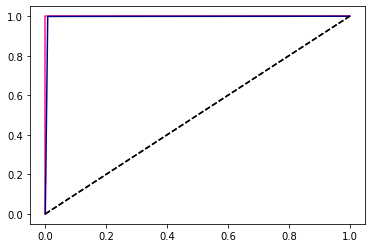

In [ ]:
print_score(random_forest,X_train,y_train,X_test,y_test,train=True)
print_score(random_forest,X_train,y_train,X_test,y_test,train=False)

In [ ]:
y_rf=random_forest.predict(X_test)
accuracy_score_rf=accuracy_score(y_test,y_rf)
print('Accuracy of RandomForest is:',accuracy_score_rf)

Accuracy of RandomForest is: 0.9954954954954955


### **b)Grid Search Cross Validation**

In [ ]:
param_grid={'max_depth':[50,60,75],
            'n_estimators':[1400,1425,1450],
            'max_features':['sqrt'],
            'min_samples_split':[4,5,6],
            'min_samples_leaf':[1],
            'bootstrap':[False],
            'criterion':["gini"]}

random_forest_clf=RandomForestClassifier(random_state=42,n_estimators=1000)
random_forest_grid=GridSearchCV(random_forest_clf,param_grid,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

In [ ]:
random_forest_grid.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  81 out of  81 | elapsed: 10.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=1000, n_jobs=None,
                                              oob_score=False, random_state=42,
                                 

In [ ]:
random_forest_grid.best_estimator_

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Train Result:
accuracy_score:1.0

classification report: 
	Precision:1.0
	Recall Score:1.0
	F1_score:1.0

confusion_matrix:
[[2571    0]
 [   0 2607]]

Test Result:
accuracy_score:0.9954954954954955

classification report: 
	Precision:0.9918181818181818 
	Recall Score:0.9990842490842491 
	F1_score:0.9954379562043797

confusion_matrix:
[[1119    9]
 [   1 1091]]


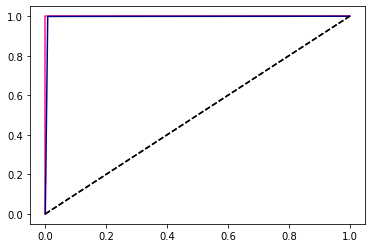

In [ ]:
random_forest_clf=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=1400,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
random_forest_clf.fit(X_train,y_train)
print_score(random_forest_clf,X_train,y_train,X_test,y_test,train=True)
print_score(random_forest_clf,X_train,y_train,X_test,y_test,train=False)

In [ ]:
y_rf_pred=random_forest.predict(X_test)
accuracy_score_rf_grid=accuracy_score(y_test,y_rf_pred)
print('Accuracy of RandomForest is:',accuracy_score_rf)

Accuracy of RandomForest is: 0.9954954954954955


Text(0.5, 15.0, 'Predicted Class')

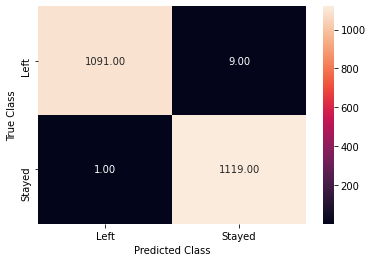

In [ ]:
rf_cm=confusion_matrix(y_rf,y_test,[1,0])
sns.heatmap(rf_cm,annot=True,fmt='.2f',xticklabels=['Left','Stayed'],yticklabels=['Left','Stayed'])
plt.ylabel('True Class')
plt.xlabel('Predicted Class')

### **Feature ranking via Random Forest**

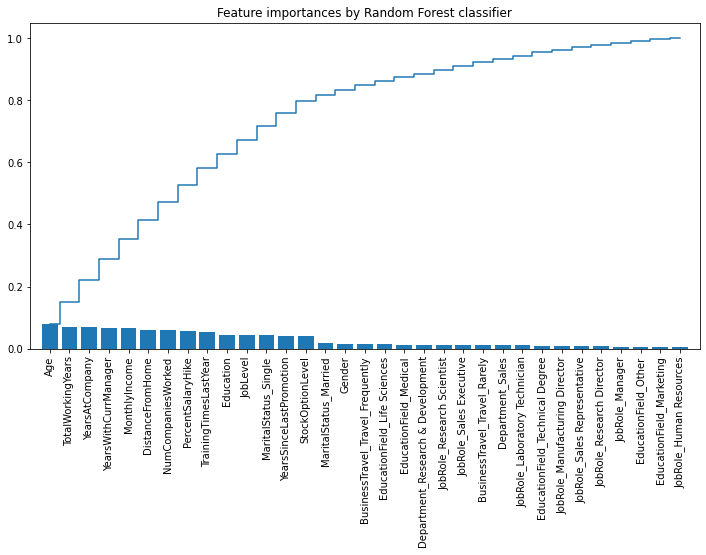

In [ ]:
importances=random_forest_clf.feature_importances_
feature_names=data.drop(['Attrition'],axis=1).columns
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.bar(range(len(indices)),importances[indices],align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feature_names[indices],rotation='vertical')
plt.xlim([-1,len(indices)])
plt.title('Feature importances by Random Forest classifier')
plt.show()

##### **Most RF Important features**: Monthly Income,Age,Total working years,Distance from home

#**Decision Tree Classifier**

Train Result:
accuracy_score:1.0

classification report: 
	Precision:1.0
	Recall Score:1.0
	F1_score:1.0

confusion_matrix:
[[2571    0]
 [   0 2607]]

Test Result:
accuracy_score:0.9743243243243244

classification report: 
	Precision:0.9752066115702479 
	Recall Score:0.9725274725274725 
	F1_score:0.9738651994497937

confusion_matrix:
[[1101   27]
 [  30 1062]]


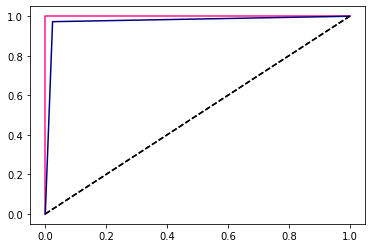

In [ ]:
tree=DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)
print_score(tree,X_train,y_train,X_test,y_test,train=True)
print_score(tree,X_train,y_train,X_test,y_test,train=False)

In [ ]:
y_DT=tree.predict(X_test)
accuracy_score_DT=accuracy_score(y_test,y_DT)
print('Accuracy of RandomForest is:',accuracy_score_DT)

Accuracy of RandomForest is: 0.9743243243243244


##**Visualization of a tree**

In [ ]:
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydot
features=list(data.columns)
features.remove('Attrition')

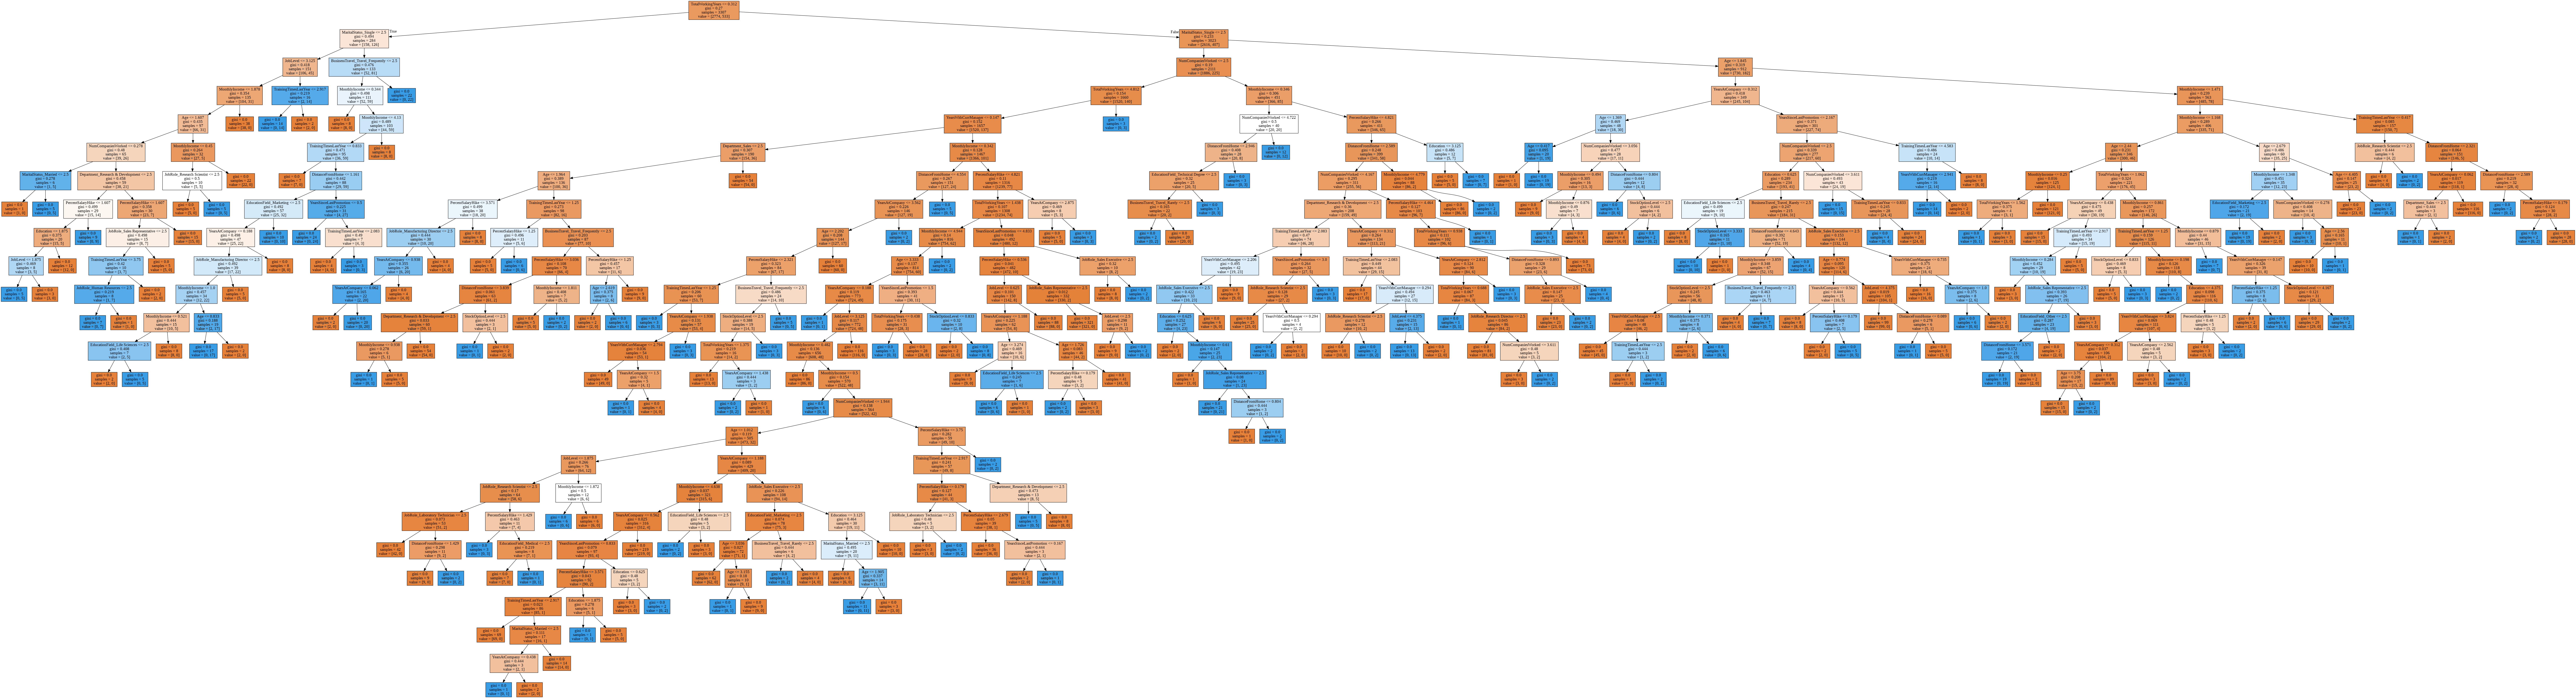

<Figure size 1080x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,7))
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## **Decision Tree Classifier Hyperparameter tuning**

In [ ]:
params={'criterion':('gini','entropy'),
        'splitter':('best','random'),
        'max_depth':(list(range(1,20))),
        'min_samples_split':[2,3,4],
        'min_samples_leaf':(list(range(1,20)))}
grid_search_cv=GridSearchCV(tree,params,scoring='accuracy',n_jobs=-1,verbose=1,cv=3)

In [ ]:
grid_search_cv.fit(X_train,y_train)
grid_search_cv.best_estimator_

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 12978 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 12993 out of 12996 | elapsed:  1.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 12996 out of 12996 | elapsed:  1.7min finished


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
tree=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=17, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Train Result:
accuracy_score:0.9879044451164197

classification report: 
	Precision:1.0
	Recall Score:0.924953095684803
	F1_score:0.9610136452241714

confusion_matrix:
[[2774    0]
 [  40  493]]

Test Result:
accuracy_score:0.9737080689029919

classification report: 
	Precision:0.9627329192546584 
	Recall Score:0.8707865168539326 
	F1_score:0.9144542772861357

confusion_matrix:
[[919   6]
 [ 23 155]]


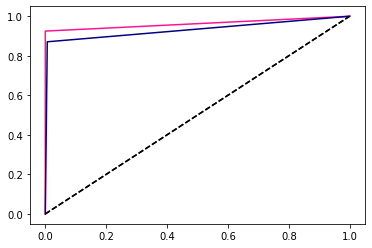

In [ ]:
print_score(tree,X_train,y_train,X_test,y_test,train=True)
print_score(tree,X_train,y_train,X_test,y_test,train=False)

In [ ]:
y_tree=tree.predict(X_test)
accuracy_score_tree=accuracy_score(y_test,y_tree)
print('Accuracy of RandomForest is:',accuracy_score_tree)

Accuracy of RandomForest is: 0.9737080689029919


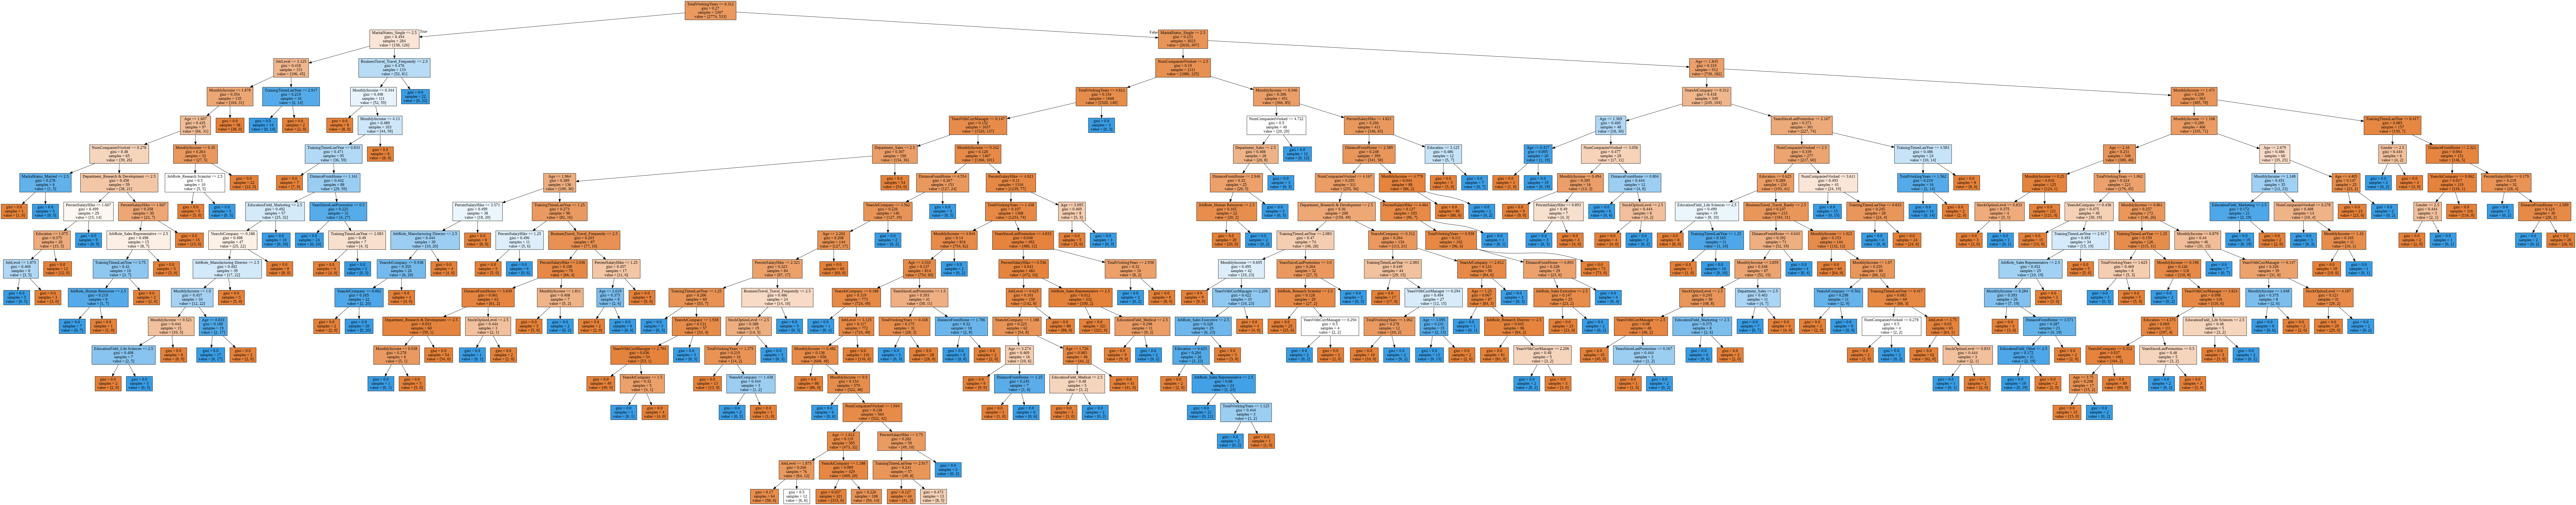

<Figure size 1080x504 with 0 Axes>

In [ ]:
plt.figure(figsize=(15,7))
dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=features,filled=True)
graph=pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## **Feature Importance**

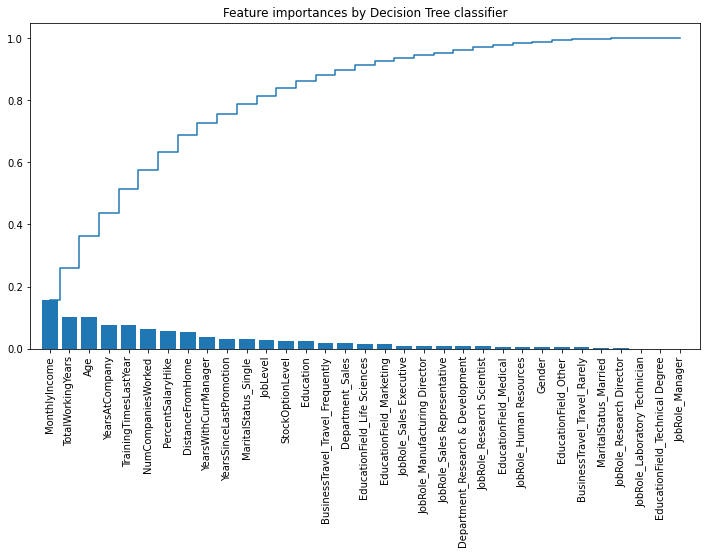

In [ ]:
importances=tree.feature_importances_
feature_names=data.drop(['Attrition'],axis=1).columns
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.bar(range(len(indices)),importances[indices],align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feature_names[indices],rotation='vertical')
plt.xlim([-1,len(indices)])
plt.title('Feature importances by Decision Tree classifier')
plt.show()

# **Support Vector Machine(SVM)**

Train Result:
accuracy_score:0.9827638342908981

classification report: 
	Precision:1.0
	Recall Score:0.8930581613508443
	F1_score:0.9435084241823588

confusion_matrix:
[[2774    0]
 [  57  476]]

Test Result:
accuracy_score:0.9592021758839528

classification report: 
	Precision:0.9784172661870504 
	Recall Score:0.7640449438202247 
	F1_score:0.8580441640378549

confusion_matrix:
[[922   3]
 [ 42 136]]


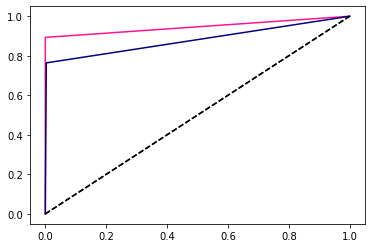

In [ ]:
svm=SVC(C=0.01,gamma=0.1,kernel='poly',degree=5,probability=True)
svm.fit(X_train,y_train)
print_score(svm,X_train,y_train,X_test,y_test,train=True)
print_score(svm,X_train,y_train,X_test,y_test,train=False)

In [ ]:
y_svm=svm.predict(X_test)
accuracy_score_svm=accuracy_score(y_test,y_svm)
print('Accuracy of RandomForest is:',accuracy_score_svm)

Accuracy of RandomForest is: 0.9592021758839528


# **Gradient Boosting Classifier**


Gradient Boosting is also an ensemble technique much like the Random Forest where a combination of weak tree learnres are brought together to form a relatively stronger learner.The technique involves defining some sort of function (loss function) that you want minimised and an method/algorithm to minimise this. Therefore as the name suggests, the algorithm used to minimise the loss function is that of a gradient descent method which adds decision trees which "point" in the direction that reduces our loss function (downward gradient).

**Initialising Gradient Boosting Parameters**

In general there are a handful of key parameter when setting up tree-based or gradient boosted models. These are always going to be the number of estimators, the maximum depth with which you want your model to be trained to, and the minimum samples per leaf.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
#Gradient Boosting Parameters
seed=0
gb_params={
    'n_estimators':500,
    'max_features':0.9,
    'learning_rate':0.2,
    'max_depth':11,
    'min_samples_leaf':2,
    'subsample':1,
    'max_features':'sqrt',
    'random_state':seed,
    'verbose':0
}
gbc_clf = GradientBoostingClassifier(**gb_params)
gbc_clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.2, loss='deviance', max_depth=11,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=2, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
y_pred=gbc_clf.predict(X_test)
print("Accuracy_score:",accuracy_score(y_test,y_pred))
print("Classification report:","\n",classification_report(y_test,y_pred))
print("auc:","\n",roc_auc_score(y_test, y_pred))
print("f1_score:","\n", f1_score(y_test, y_pred))

Accuracy_score: 0.9918404351767905
Classification report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       925
           1       1.00      0.95      0.97       178

    accuracy                           0.99      1103
   macro avg       1.00      0.97      0.98      1103
weighted avg       0.99      0.99      0.99      1103

auc: 
 0.9747191011235955
f1_score: 
 0.9740634005763689


Train Result:
accuracy_score:1.0

classification report: 
	Precision:1.0
	Recall Score:1.0
	F1_score:1.0

confusion_matrix:
[[2774    0]
 [   0  533]]

Test Result:
accuracy_score:0.9918404351767905

classification report: 
	Precision:1.0 
	Recall Score:0.949438202247191 
	F1_score:0.9740634005763689

confusion_matrix:
[[925   0]
 [  9 169]]


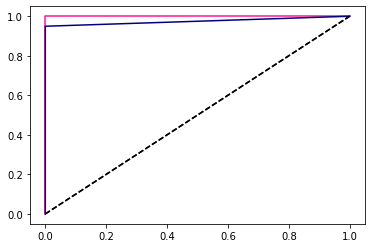

In [ ]:
print_score(gbc_clf,X_train,y_train,X_test,y_test,train=True)
print_score(gbc_clf,X_train,y_train,X_test,y_test,train=False)

In [ ]:
y_gbc=gbc_clf.predict(X_test)
accuracy_score_gbc=accuracy_score(y_test,y_gbc)
print('Accuracy of RandomForest is:',accuracy_score_gbc)

Accuracy of RandomForest is: 0.9918404351767905


### **Feature Importance**

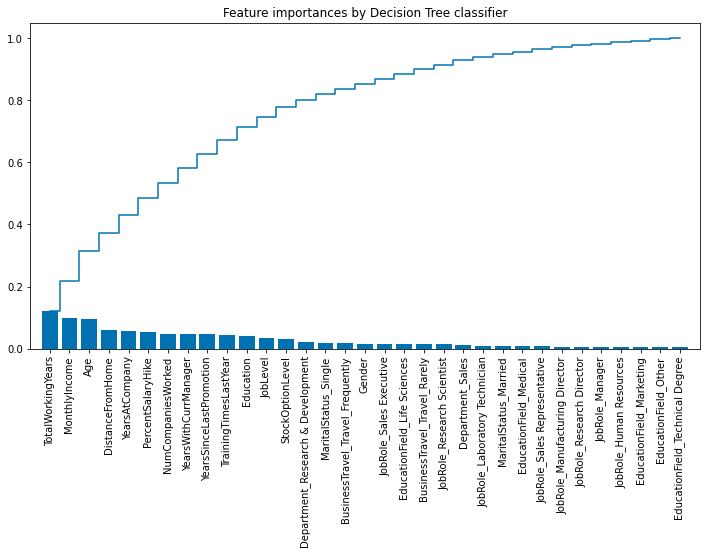

In [ ]:
importances=gbc_clf.feature_importances_
feature_names=data.drop(['Attrition'],axis=1).columns
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.bar(range(len(indices)),importances[indices],align='center')
plt.step(range(len(indices)),np.cumsum(importances[indices]),where='mid',label='Cumulative')
plt.xticks(range(len(indices)),feature_names[indices],rotation='vertical')
plt.xlim([-1,len(indices)])
plt.title('Feature importances by Decision Tree classifier')
plt.show()

### **Comparing ROC Curve for all models**

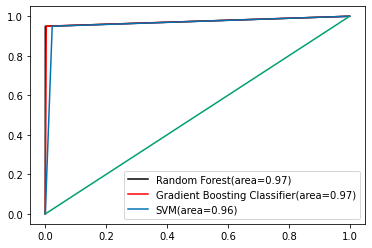

In [ ]:
rf_predict=random_forest_clf.predict(X_test)
dt_predict=tree.predict(X_test)
gbc_predict=gbc_clf.predict(X_test)
#XGB_predict=
svm_predict=svm.predict(X_test)
rf_fpr,rf_tpr,_=roc_curve(y_test,rf_predict)
rf_roc_auc=auc(rf_fpr,rf_tpr)

gbc_fpr,gbc_tpr,_=roc_curve(y_test,gbc_predict)
gbc_roc_auc=auc(gbc_fpr,gbc_tpr)

svm_fpr,svm_tpr,_=roc_curve(y_test,svm_predict)
svm_roc_auc=auc(svm_fpr,svm_tpr)

#gbc_fpr,gbc_tpr=roc_curve(y_test,gbc_predict)
#gbc_roc_auc=auc(gbc_fpr,gbc_tpr)

plt.figure()
plt.plot(rf_fpr,rf_tpr,label='Random Forest(area=%0.2f)' % rf_roc_auc,color='black')
plt.plot(gbc_fpr,gbc_tpr,label='Gradient Boosting Classifier(area=%0.2f)'% gbc_roc_auc,color='red')
plt.plot(svm_fpr,svm_tpr,label='SVM(area=%0.2f)'% svm_roc_auc)
plt.plot([0,1],[0,1])
plt.legend(loc='lower right')

### **Comparing various classifiers by Accuracy**

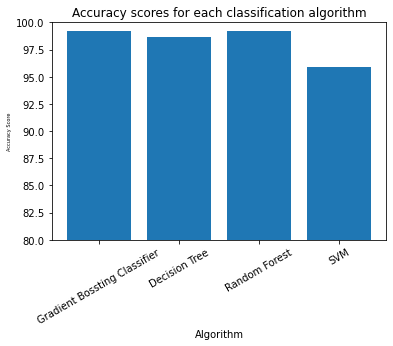

In [ ]:
scores = [accuracy_score_gbc,accuracy_score_DT,accuracy_score_rf,accuracy_score_svm]
scores = [i*100 for i in scores]
algorithm  = ['Gradient Bossting Classifier','Decision Tree','Random Forest','SVM']
index = np.arange(len(algorithm))
plt.bar(index, scores)
plt.xlabel('Algorithm', fontsize=10)
plt.ylabel('Accuracy Score', fontsize=5)
plt.xticks(index, algorithm, fontsize=10, rotation=30)
plt.title('Accuracy scores for each classification algorithm')
plt.ylim(80,100)
plt.show() 

As we can see Gardient Boosting and Random Forest takes the lead,we can break down the metrics to see what are the most driving factors are:

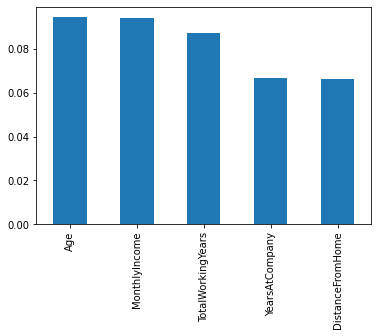

In [ ]:
feature_names=data.drop(['Attrition'],axis=1).columns
feature_importances=pd.Series(random_forest.feature_importances_,index=feature_names)
feature_importances=feature_importances.nlargest(5)
feature_importances.plot(kind='bar')
plt.show()

# **Conclusions:**
    

## **DistanceFromHome*:**
Employees who live further from home are more likely to leave the company. Hence, efforts should be made to provide support in the form of company transportation for clusters of employees leaving the same area, or in the form of Transportation Allowance. Initial screening of employees based on their home location is probably not recommended as it would be regarded as a form of discrimination as long as employees make it to work on time every day.

## **TotalWorkingYears:**
The more experienced employees are less likely to leave. 
Employees who have between 5-8 years of experience should be identified as potentially having a higher-risk of leaving.

## **YearsAtCompany:** 
Loyal companies are less likely to leave. Employees who hit their two-year anniversary should be identified as potentially having a higher-risk of leaving.

## **Age:**
Employees in relatively young age bracket 25-35 are more likely to leave. Hence, efforts should be made to clearly articulate the long-term vision of the company and young employees fit in that vision, as well as provide incentives in the form of clear paths to promotion for instance.

## **Monthly Income:**
people on higher wages are less likely to leave the company. Hence, efforts should be made to gather information on industry benchmarks in the current local market to determine if the company is providing competitive wages.